# Import

In [1]:
import numpy as np
print(f'numpy version = {np.__version__}')

import tensorflow as tf
print(f'tensorflow version = {tf.__version__}')

numpy version = 1.21.5
tensorflow version = 2.5.0


In [2]:
import os
import cv2
import csv
import sys
import math
import operator
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import mediapipe as mp
import tensorflow as tf
import matplotlib.pyplot as plt
from tableone import TableOne
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_confusion_matrix

# Global Variables

In [3]:
n_FOLD = 5
n_SUBTASK = 4

remove_dementia_pid_list = [22, 33, 57, 58, 64, 66, 67]
remove_dementia_pid_list_str = ['22', '33', '57', '58', '64', '66', '67']

random_seed_list = [10, 20, 42, 64, 100, 123, 200, 456, 1001, 12321]

w_result_randomseed_path = "../Walking Subtask/LOG_FS/Walking_RandomSeed_FS/Results/"
s_result_randomseed_path = "../Sit-Stand Subtask/LOG/Results/"
t_result_randomseed_path = "../Turning Subtask/LOG/Results/"
f_result_randomseed_path = "../Facial_Subtask_Zaxis/LOG_Zaxis_FS/Facial_RandomSeed/Results/"


# Subject ID

In [4]:
all_pid_list = []
all_pid_list_based = []
walk_pid_list, sitstand_pid_list, turn_pid_list, facial_pid_list = [], [], [], []


df_walk = pd.read_csv("../Walking Subtask/LOG_FS/Walking_RandomSeed_FS/Results/10_FS_weighted.csv")
df_sitstand = pd.read_csv("../Sit-Stand Subtask/LOG/Results/10_SitStand_combined.csv")
df_turn = pd.read_csv("../Turning Subtask/LOG/Results/10_Turning_Subtask.csv")
df_facial = pd.read_csv("../Facial_Subtask_Zaxis/LOG_Zaxis_FS/Facial_RandomSeed/Results/10_FS_weighted.csv")


def get_all_pid(walk, sitstand, facial, turn):
    tmp_list = []
    
    for i in range(walk.shape[0]):
        pid = walk.loc[i, 'pid']
        tmp_list.append(pid)
    for i in range(sitstand.shape[0]):
        pid = sitstand.loc[i, 'pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Sit&Stand] pid: {pid}')
    for i in range(facial.shape[0]):
        pid = facial.loc[i, 'pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Facial] pid: {pid}')
    for i in range(turn.shape[0]):
        pid = turn.loc[i, 'pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Turning] pid: {pid}')
    return tmp_list

def get_all_pid_based(walk, sitstand, facial, turn, pidList):
    tmp_list = []
    pid_walk, pid_sitstand, pid_turn, pid_facial = [], [], [], []
    
    for i in range(walk.shape[0]): pid_walk.append(walk.loc[i, 'pid'])
    for i in range(sitstand.shape[0]): pid_sitstand.append(sitstand.loc[i, 'pid'])
    for i in range(turn.shape[0]): pid_turn.append(turn.loc[i, 'pid'])
    for i in range(facial.shape[0]): pid_facial.append(facial.loc[i, 'pid'])

    for pid in pidList:
        if (pid in pid_walk) and (pid in pid_sitstand) and (pid in pid_turn) and (pid in pid_facial):
            tmp_list.append(pid)
    return tmp_list, pid_walk, pid_sitstand, pid_turn, pid_facial


all_pid_list = get_all_pid(df_walk, df_sitstand, df_facial, df_turn)
all_pid_list_based, walk_pid_list, sitstand_pid_list, turn_pid_list, facial_pid_list = get_all_pid_based(df_walk, df_sitstand, df_facial, df_turn, all_pid_list)

print(f'# of valid pid: {len(all_pid_list)} subjects.')
print(all_pid_list)
print(f'\n# of valid pid (based): {len(all_pid_list_based)} subjects.')
print(all_pid_list_based)

print(f'\n# of subjects in 【Walking】 Subtask: {len(walk_pid_list)} subjects.')
print(walk_pid_list)
print(f'\n# of subjects in 【SitStand】 Subtask: {len(sitstand_pid_list)} subjects.')
print(sitstand_pid_list)
print(f'\n# of subjects in 【Turning】 Subtask: {len(turn_pid_list)} subjects.')
print(turn_pid_list)
print(f'\n# of subjects in 【Facial】 Subtask: {len(facial_pid_list)} subjects.')
print(facial_pid_list)

# of valid pid: 99 subjects.
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 8, 14, 15, 23, 42, 47, 50, 53, 54, 55, 56]

# of valid pid (based): 81 subjects.
[1, 2, 3, 5, 6, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

# of subjects in 【Walking】 Subtask: 88 subjects.
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 

# Label & Age

In [5]:
ADLabel_dict = {}
excel_path = "../Label_Data_Info.xlsx" 

df_label = pd.read_excel(excel_path, usecols=['編號', 'Age', 'Gender', '_Label']) # [update] 2023/06/17
df_label = df_label.fillna(0)
df_label = df_label.astype({"_Label": int})

Label_arr = np.array(df_label['_Label'])
ADLabel_dict = dict(zip(df_label.編號, df_label._Label))

print(ADLabel_dict)

{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 1, 12: 1, 13: 0, 14: 0, 15: 0, 16: 1, 17: 1, 18: 1, 19: 0, 20: 1, 21: 0, 22: 0, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 0, 30: 0, 31: 1, 32: 1, 33: 0, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 1, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 1, 60: 1, 61: 1, 62: 1, 63: 0, 64: 0, 65: 1, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0}


In [6]:
AgeLabel_dict = {}
excel_path = "../Label_Data_Info.xlsx" 

df_label = pd.read_excel(excel_path, usecols=['編號', 'Age', 'Gender'])
df_label = df_label.fillna(0)
df_label = df_label.astype({"Age": int})

Label_arr = np.array(df_label['Age'])
AgeLabel_dict = dict(zip(df_label.編號, df_label.Age))

print(AgeLabel_dict)

{1: 40, 2: 28, 3: 29, 4: 71, 5: 75, 6: 80, 7: 40, 8: 58, 9: 87, 10: 74, 11: 74, 12: 74, 13: 75, 14: 47, 15: 54, 16: 78, 17: 86, 18: 86, 19: 75, 20: 76, 21: 74, 22: 52, 23: 88, 24: 78, 25: 78, 26: 77, 27: 79, 28: 84, 29: 60, 30: 67, 31: 85, 32: 76, 33: 67, 34: 69, 35: 80, 36: 87, 37: 86, 38: 67, 39: 73, 40: 74, 41: 0, 42: 60, 43: 72, 44: 96, 45: 89, 46: 87, 47: 66, 48: 87, 49: 78, 50: 59, 51: 70, 52: 75, 53: 49, 54: 58, 55: 28, 56: 38, 57: 66, 58: 73, 59: 89, 60: 89, 61: 80, 62: 75, 63: 66, 64: 68, 65: 72, 66: 63, 67: 69, 68: 72, 69: 49, 70: 48, 71: 35, 72: 60, 73: 57, 74: 33, 75: 23, 76: 62, 77: 68, 78: 69, 79: 68, 80: 65, 81: 69, 82: 65, 83: 73, 84: 68, 85: 70, 86: 69, 87: 73, 88: 80, 89: 58, 90: 43, 91: 28, 92: 60, 93: 36, 94: 23, 95: 62, 96: 69, 97: 64, 98: 72, 99: 65, 100: 68}


# Fold Index Mapping

In [7]:
testPid_walk_5f, testPid_sitstand_5f, testPid_turn_5f, testPid_facial_5f = [], [], [], []

def get_subtask_5f_subjectId():
    walk_test_csv = '../../5_Gait_and_Eye/Training_Fix_5Fold/walk_test_5fold.csv'
    sitstand_test_csv = '../../5_Gait_and_Eye/Training_Fix_5Fold/sitstand_test_5fold.csv'
    turn_test_csv = '../../5_Gait_and_Eye/Training_Fix_5Fold/turn_test_5fold.csv'
    facial_test_csv = '../../5_Gait_and_Eye/Training_Fix_5Fold/eyes_test_5fold.csv'
    
    tmp_walk_testID_5f, tmp_sitstand_testID_5f, tmp_turn_testID_5f, tmp_facial_testID_5f = [], [], [], []
    
    walk_file = open(walk_test_csv, "r")
    tmp_walk_testID_5f = list(csv.reader(walk_file, delimiter=","))
    walk_file.close()

    sitstand_file = open(sitstand_test_csv, "r")
    tmp_sitstand_testID_5f = list(csv.reader(sitstand_file, delimiter=","))
    sitstand_file.close()

    turn_file = open(turn_test_csv, "r")
    tmp_turn_testID_5f = list(csv.reader(turn_file, delimiter=","))
    turn_file.close()

    facial_file = open(facial_test_csv, "r")
    tmp_facial_testID_5f = list(csv.reader(facial_file, delimiter=","))
    facial_file.close()
    return tmp_walk_testID_5f, tmp_sitstand_testID_5f, tmp_turn_testID_5f, tmp_facial_testID_5f


testPid_walk_5f, testPid_sitstand_5f, testPid_turn_5f, testPid_facial_5f = get_subtask_5f_subjectId()

In [8]:
walk_subjects_foldIdx, sitstand_subjects_foldIdx, turn_subject_foldIdx, facial_subjects_foldIdx = {}, {}, {}, {}

def get_each_subtask_subject():
    tmp_walk, tmp_sitstand, tmp_turn, tmp_facial = {}, {}, {}, {}
    for fold_idx in range(n_FOLD):
        tmp_list = testPid_walk_5f[fold_idx]
        for pid in tmp_list:
            tmp_walk[int(pid)] = fold_idx

        tmp_list = testPid_sitstand_5f[fold_idx]
        for pid in tmp_list:
            tmp_sitstand[int(pid)] = fold_idx

        tmp_list = testPid_turn_5f[fold_idx]
        for pid in tmp_list:
            tmp_turn[int(pid)] = fold_idx

        tmp_list = testPid_facial_5f[fold_idx]
        for pid in tmp_list:
            tmp_facial[int(pid)] = fold_idx
    return tmp_walk, tmp_sitstand, tmp_turn, tmp_facial

walk_subjects_foldIdx, sitstand_subjects_foldIdx, turn_subjects_foldIdx, facial_subjects_foldIdx = get_each_subtask_subject()

print(f'Walking Subtask: {len(walk_subjects_foldIdx)} subjects.')
print(f'SitStand Subtask: {len(sitstand_subjects_foldIdx)} subjects.')
print(f'Turn Subtask: {len(turn_subjects_foldIdx)} subjects.')
print(f'Facial Subtask: {len(facial_subjects_foldIdx)} subjects.')

Walking Subtask: 88 subjects.
SitStand Subtask: 88 subjects.
Turn Subtask: 83 subjects.
Facial Subtask: 96 subjects.


In [9]:
walk_subjects_foldIdx[1]

0

# Threshold

In [10]:
threshold_walk = {}
threshold_sitstand = {}
threshold_turn = {}
threshold_facial = {}

def read_threshold_from_CSV_file(folder):
    tmp_dict = {}
    for seed_value in random_seed_list:
        filename = folder + str(seed_value) + "/Parameters/threshold_5fold.csv"

        threshold_list = []
        with open(filename, newline='') as csvfile:
            rows = csv.reader(csvfile)
            threshold_list_string = next(rows)
        for num in threshold_list_string:
            threshold_list.append(float(num))
        tmp_dict[seed_value] = threshold_list
    return tmp_dict


threshold_walk = read_threshold_from_CSV_file("../Walking Subtask/LOG_FS/Walking_RandomSeed_FS/")
threshold_sitstand = read_threshold_from_CSV_file("../Sit-Stand Subtask/LOG/")
threshold_turn = read_threshold_from_CSV_file("../Turning Subtask/LOG/")
threshold_facial = read_threshold_from_CSV_file("../Facial_Subtask_Zaxis/LOG_Zaxis_FS/Facial_RandomSeed/")
threshold_sitstand

{10: [0.4, 0.4, 0.42, 0.4, 0.4],
 20: [0.4, 0.4, 0.4, 0.445, 0.405],
 42: [0.435, 0.4, 0.4, 0.425, 0.4],
 64: [0.4, 0.4, 0.4, 0.42, 0.4],
 100: [0.41, 0.4, 0.4, 0.4, 0.4],
 123: [0.4, 0.4, 0.42, 0.4, 0.4],
 200: [0.405, 0.4, 0.42, 0.4, 0.4],
 456: [0.415, 0.405, 0.4, 0.425, 0.4],
 1001: [0.415, 0.43, 0.445, 0.4, 0.4],
 12321: [0.48, 0.4, 0.415, 0.4, 0.4]}

# Global Function

In [11]:
def create_walking_sitstand_facial_subtask_dictionary_RandomSeed(filename):
    data = pd.read_csv(filename)
    tmp_dict = {}
    for i in range(data.shape[0]):
        pid = data.loc[i, 'pid']
        p_class1 = data.loc[i, 'avgProb'] ### probability for class 1 (AD)
        prediction = data.loc[i, 'prediction']
        actual = data.loc[i, 'actual']
        
        p_class0 = 1 - p_class1 ### probability for class 0 (NC)
        
        tmp_dict[pid] = {}
        tmp_dict[pid]['prob_class0'] = p_class0
        tmp_dict[pid]['prob_class1'] = p_class1
        tmp_dict[pid]['prediction'] = prediction
        tmp_dict[pid]['actual'] = actual
    return tmp_dict

def create_turning_subtask_dictionary_RandomSeed(filename):
    data = pd.read_csv(filename)
    tmp_dict = {}
    for i in range(data.shape[0]):
        pid = data.loc[i, 'pid']
        p_class0 = data.loc[i, 'prob_NC']
        p_class1 = data.loc[i, 'prob_AD']
        prediction = data.loc[i, 'prediction']
        actual = data.loc[i, 'actual']
        
        tmp_dict[pid] = {}
        tmp_dict[pid]['prob_class0'] = p_class0
        tmp_dict[pid]['prob_class1'] = p_class1
        tmp_dict[pid]['prediction'] = prediction
        tmp_dict[pid]['actual'] = actual
    return tmp_dict

In [12]:
def calculate_acc_sen_spe_pre_f1score(actual_list, pred_list):
    actual_label_array = np.array(actual_list)
    predict_label_array = np.array(pred_list)

    ### Confusion Matrix
    matrix = confusion_matrix(actual_label_array, predict_label_array)
    TN, FP, FN, TP = matrix.ravel()

    value_accuracy = round((TP+TN)/(TP+TN+FP+FN), 4)
    value_sensitivity = round(TP/(TP+FN), 4)
    value_specificity = round(TN/(TN+FP), 4)
    value_precision = round(TP/(TP+FP), 4)
    value_f1_score = round(2*value_precision*value_sensitivity/(value_precision+value_sensitivity), 2)

    accuracy = round(value_accuracy*100, 2)
    sensitivity = round(value_sensitivity*100, 2)
    specificity = round(value_specificity*100, 2)
    precision = round(value_precision*100, 2)

    return accuracy, sensitivity, specificity, precision, value_f1_score

In [13]:
def organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_dict, s_dict, t_dict, f_dict):
    lambda_walk = w_f1score
    lambda_sitstand = s_f1score
    lambda_turn = t_f1score
    lambda_facial = f_f1score

    tmp_dict = {}
    for pid in pidList:
        tmp_dict[pid] = {}
        tmp_dict[pid]['Walk'] = {}
        tmp_dict[pid]['SitStand'] = {}
        tmp_dict[pid]['Turn'] = {}
        tmp_dict[pid]['Facial'] = {}

        if pid in walk_subjects_foldIdx:
            tmp_dict[pid]['Walk']['Fold'] = walk_subjects_foldIdx[pid]
            tmp_dict[pid]['Walk']['Threshold'] = threshold_walk[seed_value][walk_subjects_foldIdx[pid]]
            tmp_dict[pid]['Walk']['probAD'] = w_dict[pid]['prob_class1']
            tmp_dict[pid]['Walk']['conf'] = abs(threshold_walk[seed_value][walk_subjects_foldIdx[pid]]-w_dict[pid]['prob_class1'])
            tmp_dict[pid]['Walk']['probAD_weighted'] = round(w_dict[pid]['prob_class1']*lambda_walk, 4)
            
        if pid in sitstand_subjects_foldIdx:
            tmp_dict[pid]['SitStand']['Fold'] = sitstand_subjects_foldIdx[pid]
            tmp_dict[pid]['SitStand']['Threshold'] = threshold_sitstand[seed_value][sitstand_subjects_foldIdx[pid]]
            tmp_dict[pid]['SitStand']['probAD'] = s_dict[pid]['prob_class1']
            tmp_dict[pid]['SitStand']['conf'] = abs(threshold_sitstand[seed_value][sitstand_subjects_foldIdx[pid]]-s_dict[pid]['prob_class1'])
            tmp_dict[pid]['SitStand']['probAD_weighted'] = round(s_dict[pid]['prob_class1']*lambda_sitstand, 4)
            
        if pid in turn_subjects_foldIdx:
            tmp_dict[pid]['Turn']['Fold'] = turn_subjects_foldIdx[pid]
            tmp_dict[pid]['Turn']['Threshold'] = threshold_turn[seed_value][turn_subjects_foldIdx[pid]]
            tmp_dict[pid]['Turn']['probAD'] = t_dict[pid]['prob_class1']
            tmp_dict[pid]['Turn']['conf'] = abs(threshold_turn[seed_value][turn_subjects_foldIdx[pid]]-t_dict[pid]['prob_class1'])
            tmp_dict[pid]['Turn']['probAD_weighted'] = round(t_dict[pid]['prob_class1']*lambda_turn, 4)
            
        if pid in facial_subjects_foldIdx:
            tmp_dict[pid]['Facial']['Fold'] = facial_subjects_foldIdx[pid]
            tmp_dict[pid]['Facial']['Threshold'] = threshold_facial[seed_value][facial_subjects_foldIdx[pid]]
            tmp_dict[pid]['Facial']['probAD'] = f_dict[pid]['prob_class1']
            tmp_dict[pid]['Facial']['conf'] = abs(threshold_facial[seed_value][facial_subjects_foldIdx[pid]]-f_dict[pid]['prob_class1'])
            tmp_dict[pid]['Facial']['probAD_weighted'] = round(f_dict[pid]['prob_class1']*lambda_facial, 4)
    return tmp_dict

# 1 Subtask

## Walking Subtask

In [14]:
single_w_acc = []
single_w_sen = []
single_w_spe = []
single_w_pre = []
single_w_f1score = []


def analyze_single_w_result(pidList, seed_value_list):
    tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score = [], [], [], [], []
    for idx, seed_value in enumerate(seed_value_list):
        filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(filename)

        pred_list = []
        actual_list = []
        for pid in w_result_dict:
            if pid in pidList:
                pred = w_result_dict[pid]['prediction']
                actual = w_result_dict[pid]['actual']
                pred_list.append(pred)
                actual_list.append(actual)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(actual_list, pred_list)
        tmp_acc.append(acc)
        tmp_sen.append(sen)
        tmp_spe.append(spe)
        tmp_pre.append(pre)
        tmp_f1score.append(f1score)

        print(f'seed: {seed_value}, number of subjects: {len(pred_list)}')

    return tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score

single_w_acc, single_w_sen, single_w_spe, single_w_pre, single_w_f1score = analyze_single_w_result(walk_pid_list, random_seed_list)

seed: 10, number of subjects: 88
seed: 20, number of subjects: 88
seed: 42, number of subjects: 88
seed: 64, number of subjects: 88
seed: 100, number of subjects: 88
seed: 123, number of subjects: 88
seed: 200, number of subjects: 88
seed: 456, number of subjects: 88
seed: 1001, number of subjects: 88
seed: 12321, number of subjects: 88


In [15]:
print(f'Accuracy    ({len(single_w_acc)}), mean({round(statistics.mean(single_w_acc), 2)}), std({round(statistics.pstdev(single_w_acc), 2)}): {single_w_acc}')
print(f'Sensitivity ({len(single_w_sen)}), mean({round(statistics.mean(single_w_sen), 2)}), std({round(statistics.pstdev(single_w_sen), 2)}): {single_w_sen}')
print(f'Specificity ({len(single_w_spe)}), mean({round(statistics.mean(single_w_spe), 2)}), std({round(statistics.pstdev(single_w_spe), 2)}): {single_w_spe}')
print(f'Precision   ({len(single_w_pre)}), mean({round(statistics.mean(single_w_pre), 2)}), std({round(statistics.pstdev(single_w_pre), 2)}): {single_w_pre}')
print(f'F1-Score    ({len(single_w_f1score)}), mean({round(statistics.mean(single_w_f1score), 2)}), std({round(statistics.pstdev(single_w_f1score), 2)}): {single_w_f1score}')

Accuracy    (10), mean(91.25), std(1.61): [90.91, 93.18, 88.64, 90.91, 94.32, 92.05, 89.77, 90.91, 89.77, 92.05]
Sensitivity (10), mean(97.67), std(2.13): [96.67, 100.0, 96.67, 100.0, 100.0, 96.67, 93.33, 100.0, 96.67, 96.67]
Specificity (10), mean(87.93), std(2.04): [87.93, 89.66, 84.48, 86.21, 91.38, 89.66, 87.93, 86.21, 86.21, 89.66]
Precision   (10), mean(80.79), std(2.69): [80.56, 83.33, 76.32, 78.95, 85.71, 82.86, 80.0, 78.95, 78.38, 82.86]
F1-Score    (10), mean(0.88), std(0.02): [0.88, 0.91, 0.85, 0.88, 0.92, 0.89, 0.86, 0.88, 0.87, 0.89]


## Sit-Stand Subtask

In [16]:
single_s_acc = []
single_s_sen = []
single_s_spe = []
single_s_pre = []
single_s_f1score = []


def analyze_single_s_result(pidList, seed_value_list):
    tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score = [], [], [], [], []
    for idx, seed_value in enumerate(seed_value_list):
        filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv "
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(filename)

        pred_list = []
        actual_list = []
        for pid in s_result_dict:
            if pid in pidList:
                pred = s_result_dict[pid]['prediction']
                actual = s_result_dict[pid]['actual']
                pred_list.append(pred)
                actual_list.append(actual)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(actual_list, pred_list)
        tmp_acc.append(acc)
        tmp_sen.append(sen)
        tmp_spe.append(spe)
        tmp_pre.append(pre)
        tmp_f1score.append(f1score)

        print(f'seed: {seed_value}, number of subjects: {len(pred_list)}')

    return tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score

single_s_acc, single_s_sen, single_s_spe, single_s_pre, single_s_f1score = analyze_single_s_result(sitstand_pid_list, random_seed_list)

seed: 10, number of subjects: 88
seed: 20, number of subjects: 88
seed: 42, number of subjects: 88
seed: 64, number of subjects: 88
seed: 100, number of subjects: 88
seed: 123, number of subjects: 88
seed: 200, number of subjects: 88
seed: 456, number of subjects: 88
seed: 1001, number of subjects: 88
seed: 12321, number of subjects: 88


In [17]:
print(f'Accuracy    ({len(single_s_acc)}), mean({round(statistics.mean(single_s_acc), 2)}), std({round(statistics.pstdev(single_s_acc), 2)}): {single_s_acc}')
print(f'Sensitivity ({len(single_s_sen)}), mean({round(statistics.mean(single_s_sen), 2)}), std({round(statistics.pstdev(single_s_sen), 2)}): {single_s_sen}')
print(f'Specificity ({len(single_s_spe)}), mean({round(statistics.mean(single_s_spe), 2)}), std({round(statistics.pstdev(single_s_spe), 2)}): {single_s_spe}')
print(f'Precision   ({len(single_s_pre)}), mean({round(statistics.mean(single_s_pre), 2)}), std({round(statistics.pstdev(single_s_pre), 2)}): {single_s_pre}')
print(f'F1-Score    ({len(single_s_f1score)}), mean({round(statistics.mean(single_s_f1score), 2)}), std({round(statistics.pstdev(single_s_f1score), 2)}): {single_s_f1score}')

Accuracy    (10), mean(65.23), std(3.88): [65.91, 63.64, 57.95, 71.59, 65.91, 70.45, 65.91, 62.5, 61.36, 67.05]
Sensitivity (10), mean(34.67), std(11.66): [63.33, 36.67, 30.0, 43.33, 16.67, 36.67, 33.33, 30.0, 26.67, 30.0]
Specificity (10), mean(81.04), std(7.03): [67.24, 77.59, 72.41, 86.21, 91.38, 87.93, 82.76, 79.31, 79.31, 86.21]
Precision   (10), mean(49.06), std(7.93): [50.0, 45.83, 36.0, 61.9, 50.0, 61.11, 50.0, 42.86, 40.0, 52.94]
F1-Score    (10), mean(0.4), std(0.09): [0.56, 0.41, 0.33, 0.51, 0.25, 0.46, 0.4, 0.35, 0.32, 0.38]


## Turning Subtask

In [18]:
single_t_acc = []
single_t_sen = []
single_t_spe = []
single_t_pre = []
single_t_f1score = []


def analyze_single_t_result(pidList, seed_value_list):
    tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score = [], [], [], [], []
    for idx, seed_value in enumerate(seed_value_list):
        filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(filename)

        pred_list = []
        actual_list = []
        for pid in t_result_dict:
            if pid in pidList:
                pred = t_result_dict[pid]['prediction']
                actual = t_result_dict[pid]['actual']
                pred_list.append(pred)
                actual_list.append(actual)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(actual_list, pred_list)
        tmp_acc.append(acc)
        tmp_sen.append(sen)
        tmp_spe.append(spe)
        tmp_pre.append(pre)
        tmp_f1score.append(f1score)
        print(f'seed: {seed_value}, number of subjects: {len(pred_list)}')
    return tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score

single_t_acc, single_t_sen, single_t_spe, single_t_pre, single_t_f1score = analyze_single_t_result(turn_pid_list, random_seed_list)

seed: 10, number of subjects: 83
seed: 20, number of subjects: 83
seed: 42, number of subjects: 83
seed: 64, number of subjects: 83
seed: 100, number of subjects: 83
seed: 123, number of subjects: 83
seed: 200, number of subjects: 83
seed: 456, number of subjects: 83
seed: 1001, number of subjects: 83
seed: 12321, number of subjects: 83


In [19]:
print(f'Accuracy    ({len(single_t_acc)}), mean({round(statistics.mean(single_t_acc), 2)}), std({round(statistics.pstdev(single_t_acc), 2)}): {single_t_acc}')
print(f'Sensitivity ({len(single_t_sen)}), mean({round(statistics.mean(single_t_sen), 2)}), std({round(statistics.pstdev(single_t_sen), 2)}): {single_t_sen}')
print(f'Specificity ({len(single_t_spe)}), mean({round(statistics.mean(single_t_spe), 2)}), std({round(statistics.pstdev(single_t_spe), 2)}): {single_t_spe}')
print(f'Precision   ({len(single_t_pre)}), mean({round(statistics.mean(single_t_pre), 2)}), std({round(statistics.pstdev(single_t_pre), 2)}): {single_t_pre}')
print(f'F1-Score    ({len(single_t_f1score)}), mean({round(statistics.mean(single_t_f1score), 2)}), std({round(statistics.pstdev(single_t_f1score), 2)}): {single_t_f1score}')

Accuracy    (10), mean(81.81), std(0.36): [81.93, 81.93, 81.93, 80.72, 81.93, 81.93, 81.93, 81.93, 81.93, 81.93]
Sensitivity (10), mean(68.84), std(1.16): [69.23, 69.23, 69.23, 65.38, 69.23, 69.23, 69.23, 69.23, 69.23, 69.23]
Specificity (10), mean(87.72), std(0.0): [87.72, 87.72, 87.72, 87.72, 87.72, 87.72, 87.72, 87.72, 87.72, 87.72]
Precision   (10), mean(71.88), std(0.35): [72.0, 72.0, 72.0, 70.83, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0]
F1-Score    (10), mean(0.71), std(0.01): [0.71, 0.71, 0.71, 0.68, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71]


## Facial Subtask

In [20]:
single_f_acc = []
single_f_sen = []
single_f_spe = []
single_f_pre = []
single_f_f1score = []

def analyze_single_f_result(pidList, seed_value_list):
    tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score = [], [], [], [], []
    for idx, seed_value in enumerate(seed_value_list):
        filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(filename)

        pred_list = []
        actual_list = []
        for pid in f_result_dict:
            if pid in pidList:
                pred = f_result_dict[pid]['prediction']
                actual = f_result_dict[pid]['actual']
                pred_list.append(pred)
                actual_list.append(actual)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(actual_list, pred_list)
        tmp_acc.append(acc)
        tmp_sen.append(sen)
        tmp_spe.append(spe)
        tmp_pre.append(pre)
        tmp_f1score.append(f1score)
        print(f'seed: {seed_value}, number of subjects: {len(pred_list)}')
    return tmp_acc, tmp_sen, tmp_spe, tmp_pre, tmp_f1score

single_f_acc, single_f_sen, single_f_spe, single_f_pre, single_f_f1score = analyze_single_f_result(facial_pid_list, random_seed_list)

seed: 10, number of subjects: 96
seed: 20, number of subjects: 96
seed: 42, number of subjects: 96
seed: 64, number of subjects: 96
seed: 100, number of subjects: 96
seed: 123, number of subjects: 96
seed: 200, number of subjects: 96
seed: 456, number of subjects: 96
seed: 1001, number of subjects: 96
seed: 12321, number of subjects: 96


In [21]:
print(f'Accuracy    ({len(single_f_acc)}), mean({round(statistics.mean(single_f_acc), 2)}), std({round(statistics.pstdev(single_f_acc), 2)}): {single_f_acc}')
print(f'Sensitivity ({len(single_f_sen)}), mean({round(statistics.mean(single_f_sen), 2)}), std({round(statistics.pstdev(single_f_sen), 2)}): {single_f_sen}')
print(f'Specificity ({len(single_f_spe)}), mean({round(statistics.mean(single_f_spe), 2)}), std({round(statistics.pstdev(single_f_spe), 2)}): {single_f_spe}')
print(f'Precision   ({len(single_f_pre)}), mean({round(statistics.mean(single_f_pre), 2)}), std({round(statistics.pstdev(single_f_pre), 2)}): {single_f_pre}')
print(f'F1-Score    ({len(single_f_f1score)}), mean({round(statistics.mean(single_f_f1score), 2)}), std({round(statistics.pstdev(single_f_f1score), 2)}): {single_f_f1score}')

Accuracy    (10), mean(83.12), std(3.25): [78.12, 82.29, 89.58, 86.46, 80.21, 83.33, 81.25, 85.42, 80.21, 84.38]
Sensitivity (10), mean(55.17), std(9.12): [48.28, 48.28, 72.41, 58.62, 41.38, 58.62, 65.52, 55.17, 44.83, 58.62]
Specificity (10), mean(95.22), std(3.19): [91.04, 97.01, 97.01, 98.51, 97.01, 94.03, 88.06, 98.51, 95.52, 95.52]
Precision   (10), mean(84.06), std(8.24): [70.0, 87.5, 91.3, 94.44, 85.71, 80.95, 70.37, 94.12, 81.25, 85.0]
F1-Score    (10), mean(0.66), std(0.07): [0.57, 0.62, 0.81, 0.72, 0.56, 0.68, 0.68, 0.7, 0.58, 0.69]


# 2 Subtask

In [22]:
def get_two_subtask_combination():
    s1 = "walk"
    s2 = "sitstand"
    s3 = "turn"
    s4 = "facial"

    combination = []
    combination.append([s1, s2])
    combination.append([s1, s3])
    combination.append([s1, s4])
    combination.append([s2, s3])
    combination.append([s2, s4])
    combination.append([s3, s4])
    return combination
    
two_subtask_combination = get_two_subtask_combination()

print(f'-------------- [Two Subtasks] --------------')
print(two_subtask_combination)

-------------- [Two Subtasks] --------------
[['walk', 'sitstand'], ['walk', 'turn'], ['walk', 'facial'], ['sitstand', 'turn'], ['sitstand', 'facial'], ['turn', 'facial']]


In [23]:
WS_acc, WS_sen, WS_spe, WS_pre, WS_f1s = [], [], [], [], []
WT_acc, WT_sen, WT_spe, WT_pre, WT_f1s = [], [], [], [], []
WF_acc, WF_sen, WF_spe, WF_pre, WF_f1s = [], [], [], [], []
ST_acc, ST_sen, ST_spe, ST_pre, ST_f1s = [], [], [], [], []
SF_acc, SF_sen, SF_spe, SF_pre, SF_f1s = [], [], [], [], []
TF_acc, TF_sen, TF_spe, TF_pre, TF_f1s = [], [], [], [], []


def get_weighted_result_two_subtask_RandomSeed(pidList, task1, task2, score1, score2, result1, result2, subtask_importance):
    lambda1 = score1
    lambda2 = score2

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        conf1, conf2 = 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            if task1=="walk": conf1 = subtask_importance[pid]['Walk']['conf']
            if task1=="sitstand": conf1 = subtask_importance[pid]['SitStand']['conf']
            if task1=="turn": conf1 = subtask_importance[pid]['Turn']['conf']
            if task1=="facial": conf1 = subtask_importance[pid]['Facial']['conf']
            
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            if task2=="walk": conf2 = subtask_importance[pid]['Walk']['conf']
            if task2=="sitstand": conf2 = subtask_importance[pid]['SitStand']['conf']
            if task2=="turn": conf2 = subtask_importance[pid]['Turn']['conf']
            if task2=="facial": conf2 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [{task1}, {task2}] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict
   


def analyze_two_subtask_result(pidList, combination, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]

        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)

        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)
        
        for comb in combination:
            task1, task2 = comb[0], comb[1]

            if task1=="walk": score1 = w_f1score; result1 = w_result_dict
            elif task1=="sitstand": score1 = s_f1score; result1 = s_result_dict
            elif task1=="turn": score1 = t_f1score; result1 = t_result_dict
            elif task1=="facial": score1 = f_f1score; result1 = f_result_dict
                
            if task2=="walk": score2 = w_f1score; result2 = w_result_dict
            elif task2=="sitstand": score2 = s_f1score; result2 = s_result_dict
            elif task2=="turn": score2 = t_f1score; result2 = t_result_dict
            elif task2=="facial": score2 = f_f1score; result2 = f_result_dict

            combined_pidList = []
            for pid in pidList:
                if pid in result1 or pid in result2:
                    combined_pidList.append(pid)

            print(f'-> Seed_value=[{seed_value}], Combined [{task1}, {task2}], Number of Subjects: {len(combined_pidList)}')
            pred_list, true_list, weighted_result_dict = get_weighted_result_two_subtask_RandomSeed(combined_pidList, task1, task2, score1, score2, result1, result2, subtask_importance)

            acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
            if task1=="walk" and task2=="sitstand":
                WS_acc.append(acc)
                WS_sen.append(sen)
                WS_spe.append(spe)
                WS_pre.append(pre)
                WS_f1s.append(f1score)
            elif task1=="walk" and task2=="turn":
                WT_acc.append(acc)
                WT_sen.append(sen)
                WT_spe.append(spe)
                WT_pre.append(pre)
                WT_f1s.append(f1score)
            elif task1=="walk" and task2=="facial":
                WF_acc.append(acc)
                WF_sen.append(sen)
                WF_spe.append(spe)
                WF_pre.append(pre)
                WF_f1s.append(f1score)
            elif task1=="sitstand" and task2=="turn":
                ST_acc.append(acc)
                ST_sen.append(sen)
                ST_spe.append(spe)
                ST_pre.append(pre)
                ST_f1s.append(f1score)
            elif task1=="sitstand" and task2=="facial":
                SF_acc.append(acc)
                SF_sen.append(sen)
                SF_spe.append(spe)
                SF_pre.append(pre)
                SF_f1s.append(f1score)
            elif task1=="turn" and task2=="facial":
                TF_acc.append(acc)
                TF_sen.append(sen)
                TF_spe.append(spe)
                TF_pre.append(pre)
                TF_f1s.append(f1score)

analyze_two_subtask_result(all_pid_list, two_subtask_combination, random_seed_list)

-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[10], Combined [walk, turn], Number of Subjects: 88
-> Seed_value=[10], Combined [walk, facial], Number of Subjects: 99
-> Seed_value=[10], Combined [sitstand, turn], Number of Subjects: 88
-> Seed_value=[10], Combined [sitstand, facial], Number of Subjects: 99
-> Seed_value=[10], Combined [turn, facial], Number of Subjects: 98
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[20], Combined [walk, turn], Number of Subjects: 88
-> Seed_value=[20], Combined [walk, facial], Number of Subjects: 99
-> Seed_value=[20], Combined [sitstand, turn], Number of Subjects: 88
-> Seed_value=[20], Combined [sitstand, facial], Number of Subjects: 99
-> Seed_value=[20], Combined [turn, facial], Number of Subjects: 98
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[42], Combined [walk, turn], Number of Subjects: 88
-> Seed_value=[42], Combined [walk, 

In [24]:
print(f'Accuracy    ({len(WS_acc)}), mean({round(statistics.mean(WS_acc), 2)}), std({round(statistics.pstdev(WS_acc), 2)}): {WS_acc}')
print(f'Sensitivity ({len(WS_sen)}), mean({round(statistics.mean(WS_sen), 2)}), std({round(statistics.pstdev(WS_sen), 2)}): {WS_sen}')
print(f'Specificity ({len(WS_spe)}), mean({round(statistics.mean(WS_spe), 2)}), std({round(statistics.pstdev(WS_spe), 2)}): {WS_spe}')
print(f'Precision   ({len(WS_pre)}), mean({round(statistics.mean(WS_pre), 2)}), std({round(statistics.pstdev(WS_pre), 2)}): {WS_pre}')
print(f'F1-Score    ({len(WS_f1s)}), mean({round(statistics.mean(WS_f1s), 2)}), std({round(statistics.pstdev(WS_f1s), 2)}): {WS_f1s}')

Accuracy    (10), mean(92.96), std(2.08): [92.05, 94.32, 89.77, 95.45, 96.59, 93.18, 90.91, 92.05, 90.91, 94.32]
Sensitivity (10), mean(97.67), std(2.13): [93.33, 100.0, 96.67, 100.0, 100.0, 96.67, 96.67, 100.0, 96.67, 96.67]
Specificity (10), mean(90.52), std(2.7): [91.38, 91.38, 86.21, 93.1, 94.83, 91.38, 87.93, 87.93, 87.93, 93.1]
Precision   (10), mean(84.35), std(3.86): [84.85, 85.71, 78.38, 88.24, 90.91, 85.29, 80.56, 81.08, 80.56, 87.88]
F1-Score    (10), mean(0.91), std(0.03): [0.89, 0.92, 0.87, 0.94, 0.95, 0.91, 0.88, 0.9, 0.88, 0.92]


In [25]:
print(f'Accuracy    ({len(WT_acc)}), mean({round(statistics.mean(WT_acc), 2)}), std({round(statistics.pstdev(WT_acc), 2)}): {WT_acc}')
print(f'Sensitivity ({len(WT_sen)}), mean({round(statistics.mean(WT_sen), 2)}), std({round(statistics.pstdev(WT_sen), 2)}): {WT_sen}')
print(f'Specificity ({len(WT_spe)}), mean({round(statistics.mean(WT_spe), 2)}), std({round(statistics.pstdev(WT_spe), 2)}): {WT_spe}')
print(f'Precision   ({len(WT_pre)}), mean({round(statistics.mean(WT_pre), 2)}), std({round(statistics.pstdev(WT_pre), 2)}): {WT_pre}')
print(f'F1-Score    ({len(WT_f1s)}), mean({round(statistics.mean(WT_f1s), 2)}), std({round(statistics.pstdev(WT_f1s), 2)}): {WT_f1s}')

Accuracy    (10), mean(92.84), std(1.02): [92.05, 93.18, 93.18, 92.05, 94.32, 94.32, 90.91, 93.18, 92.05, 93.18]
Sensitivity (10), mean(93.0), std(1.8): [90.0, 93.33, 93.33, 93.33, 93.33, 96.67, 93.33, 93.33, 93.33, 90.0]
Specificity (10), mean(92.76), std(1.5): [93.1, 93.1, 93.1, 91.38, 94.83, 93.1, 89.66, 93.1, 91.38, 94.83]
Precision   (10), mean(86.98), std(2.29): [87.1, 87.5, 87.5, 84.85, 90.32, 87.88, 82.35, 87.5, 84.85, 90.0]
F1-Score    (10), mean(0.9), std(0.01): [0.89, 0.9, 0.9, 0.89, 0.92, 0.92, 0.87, 0.9, 0.89, 0.9]


In [26]:
print(f'Accuracy    ({len(WF_acc)}), mean({round(statistics.mean(WF_acc), 2)}), std({round(statistics.pstdev(WF_acc), 2)}): {WF_acc}')
print(f'Sensitivity ({len(WF_sen)}), mean({round(statistics.mean(WF_sen), 2)}), std({round(statistics.pstdev(WF_sen), 2)}): {WF_sen}')
print(f'Specificity ({len(WF_spe)}), mean({round(statistics.mean(WF_spe), 2)}), std({round(statistics.pstdev(WF_spe), 2)}): {WF_spe}')
print(f'Precision   ({len(WF_pre)}), mean({round(statistics.mean(WF_pre), 2)}), std({round(statistics.pstdev(WF_pre), 2)}): {WF_pre}')
print(f'F1-Score    ({len(WF_f1s)}), mean({round(statistics.mean(WF_f1s), 2)}), std({round(statistics.pstdev(WF_f1s), 2)}): {WF_f1s}')

Accuracy    (10), mean(93.54), std(2.27): [91.92, 95.96, 91.92, 95.96, 93.94, 92.93, 88.89, 96.97, 93.94, 92.93]
Sensitivity (10), mean(93.55), std(2.04): [93.55, 96.77, 90.32, 96.77, 93.55, 93.55, 90.32, 93.55, 93.55, 93.55]
Specificity (10), mean(93.53), std(2.65): [91.18, 95.59, 92.65, 95.59, 94.12, 92.65, 88.24, 98.53, 94.12, 92.65]
Precision   (10), mean(87.03), std(4.88): [82.86, 90.91, 84.85, 90.91, 87.88, 85.29, 77.78, 96.67, 87.88, 85.29]
F1-Score    (10), mean(0.9), std(0.03): [0.88, 0.94, 0.87, 0.94, 0.91, 0.89, 0.84, 0.95, 0.91, 0.89]


In [27]:
print(f'Accuracy    ({len(ST_acc)}), mean({round(statistics.mean(ST_acc), 2)}), std({round(statistics.pstdev(ST_acc), 2)}): {ST_acc}')
print(f'Sensitivity ({len(ST_sen)}), mean({round(statistics.mean(ST_sen), 2)}), std({round(statistics.pstdev(ST_sen), 2)}): {ST_sen}')
print(f'Specificity ({len(ST_spe)}), mean({round(statistics.mean(ST_spe), 2)}), std({round(statistics.pstdev(ST_spe), 2)}): {ST_spe}')
print(f'Precision   ({len(ST_pre)}), mean({round(statistics.mean(ST_pre), 2)}), std({round(statistics.pstdev(ST_pre), 2)}): {ST_pre}')
print(f'F1-Score    ({len(ST_f1s)}), mean({round(statistics.mean(ST_f1s), 2)}), std({round(statistics.pstdev(ST_f1s), 2)}): {ST_f1s}')

Accuracy    (10), mean(75.45), std(2.6): [80.68, 75.0, 73.86, 76.14, 71.59, 76.14, 77.27, 75.0, 77.27, 71.59]
Sensitivity (10), mean(47.67), std(6.67): [63.33, 40.0, 46.67, 50.0, 40.0, 50.0, 50.0, 46.67, 50.0, 40.0]
Specificity (10), mean(89.83), std(1.63): [89.66, 93.1, 87.93, 89.66, 87.93, 89.66, 91.38, 89.66, 91.38, 87.93]
Precision   (10), mean(70.68), std(4.64): [76.0, 75.0, 66.67, 71.43, 63.16, 71.43, 75.0, 70.0, 75.0, 63.16]
F1-Score    (10), mean(0.57), std(0.06): [0.69, 0.52, 0.55, 0.59, 0.49, 0.59, 0.6, 0.56, 0.6, 0.49]


In [28]:
print(f'Accuracy    ({len(SF_acc)}), mean({round(statistics.mean(SF_acc), 2)}), std({round(statistics.pstdev(SF_acc), 2)}): {SF_acc}')
print(f'Sensitivity ({len(SF_sen)}), mean({round(statistics.mean(SF_sen), 2)}), std({round(statistics.pstdev(SF_sen), 2)}): {SF_sen}')
print(f'Specificity ({len(SF_spe)}), mean({round(statistics.mean(SF_spe), 2)}), std({round(statistics.pstdev(SF_spe), 2)}): {SF_spe}')
print(f'Precision   ({len(SF_pre)}), mean({round(statistics.mean(SF_pre), 2)}), std({round(statistics.pstdev(SF_pre), 2)}): {SF_pre}')
print(f'F1-Score    ({len(SF_f1s)}), mean({round(statistics.mean(SF_f1s), 2)}), std({round(statistics.pstdev(SF_f1s), 2)}): {SF_f1s}')

Accuracy    (10), mean(76.26), std(3.04): [77.78, 74.75, 78.79, 81.82, 71.72, 77.78, 72.73, 77.78, 72.73, 76.77]
Sensitivity (10), mean(29.36), std(9.29): [41.94, 19.35, 35.48, 41.94, 12.9, 32.26, 25.81, 32.26, 19.35, 32.26]
Specificity (10), mean(97.65), std(1.99): [94.12, 100.0, 98.53, 100.0, 98.53, 98.53, 94.12, 98.53, 97.06, 97.06]
Precision   (10), mean(85.5), std(10.48): [76.47, 100.0, 91.67, 100.0, 80.0, 90.91, 66.67, 90.91, 75.0, 83.33]
F1-Score    (10), mean(0.43), std(0.11): [0.54, 0.32, 0.51, 0.59, 0.22, 0.48, 0.37, 0.48, 0.31, 0.47]


In [29]:
print(f'Accuracy    ({len(TF_acc)}), mean({round(statistics.mean(TF_acc), 2)}), std({round(statistics.pstdev(TF_acc), 2)}): {TF_acc}')
print(f'Sensitivity ({len(TF_sen)}), mean({round(statistics.mean(TF_sen), 2)}), std({round(statistics.pstdev(TF_sen), 2)}): {TF_sen}')
print(f'Specificity ({len(TF_spe)}), mean({round(statistics.mean(TF_spe), 2)}), std({round(statistics.pstdev(TF_spe), 2)}): {TF_spe}')
print(f'Precision   ({len(TF_pre)}), mean({round(statistics.mean(TF_pre), 2)}), std({round(statistics.pstdev(TF_pre), 2)}): {TF_pre}')
print(f'F1-Score    ({len(TF_f1s)}), mean({round(statistics.mean(TF_f1s), 2)}), std({round(statistics.pstdev(TF_f1s), 2)}): {TF_f1s}')

Accuracy    (10), mean(83.77), std(1.73): [82.65, 85.71, 84.69, 84.69, 79.59, 82.65, 83.67, 83.67, 84.69, 85.71]
Sensitivity (10), mean(56.34), std(5.47): [56.67, 56.67, 56.67, 56.67, 43.33, 53.33, 60.0, 56.67, 56.67, 66.67]
Specificity (10), mean(95.88), std(1.44): [94.12, 98.53, 97.06, 97.06, 95.59, 95.59, 94.12, 95.59, 97.06, 94.12]
Precision   (10), mean(85.94), std(4.29): [80.95, 94.44, 89.47, 89.47, 81.25, 84.21, 81.82, 85.0, 89.47, 83.33]
F1-Score    (10), mean(0.68), std(0.04): [0.67, 0.71, 0.69, 0.69, 0.57, 0.65, 0.69, 0.68, 0.69, 0.74]


# 3 Subtask

In [30]:
def get_three_subtask_combination():
    s1 = "walk"
    s2 = "sitstand"
    s3 = "turn"
    s4 = "facial"

    combination = []
    combination.append([s1, s2, s3])
    combination.append([s1, s2, s4])
    combination.append([s1, s3, s4])
    combination.append([s2, s3, s4])
    return combination
    
Three_subtask_combination = get_three_subtask_combination()

print(f'-------------- [Three Subtasks] --------------')
print(Three_subtask_combination)

-------------- [Three Subtasks] --------------
[['walk', 'sitstand', 'turn'], ['walk', 'sitstand', 'facial'], ['walk', 'turn', 'facial'], ['sitstand', 'turn', 'facial']]


In [31]:
WST_acc, WST_sen, WST_spe, WST_pre, WST_f1s = [], [], [], [], []
WSF_acc, WSF_sen, WSF_spe, WSF_pre, WSF_f1s = [], [], [], [], []
WTF_acc, WTF_sen, WTF_spe, WTF_pre, WTF_f1s = [], [], [], [], []
STF_acc, STF_sen, STF_spe, STF_pre, STF_f1s = [], [], [], [], []


def get_weighted_result_three_subtask_RandomSeed(pidList, task1, task2, task3, score1, score2, score3, result1, result2, result3, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        conf1, conf2, conf3 = 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            if task1=="walk": conf1 = subtask_importance[pid]['Walk']['conf']
            if task1=="sitstand": conf1 = subtask_importance[pid]['SitStand']['conf']
            if task1=="turn": conf1 = subtask_importance[pid]['Turn']['conf']
            if task1=="facial": conf1 = subtask_importance[pid]['Facial']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            if task2=="walk": conf2 = subtask_importance[pid]['Walk']['conf']
            if task2=="sitstand": conf2 = subtask_importance[pid]['SitStand']['conf']
            if task2=="turn": conf2 = subtask_importance[pid]['Turn']['conf']
            if task2=="facial": conf2 = subtask_importance[pid]['Facial']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            if task3=="walk": conf3 = subtask_importance[pid]['Walk']['conf']
            if task3=="sitstand": conf3 = subtask_importance[pid]['SitStand']['conf']
            if task3=="turn": conf3 = subtask_importance[pid]['Turn']['conf']
            if task3=="facial": conf3 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [{task1}, {task2}, {task3}] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_three_subtask_result(pidList, combination, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]

        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)

        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)
        
        for comb in combination:
            task1, task2, task3 = comb[0], comb[1], comb[2]

            if task1=="walk": score1 = w_f1score; result1 = w_result_dict
            elif task1=="sitstand": score1 = s_f1score; result1 = s_result_dict
            elif task1=="turn": score1 = t_f1score; result1 = t_result_dict
            elif task1=="facial": score1 = f_f1score; result1 = f_result_dict
                
            if task2=="walk": score2 = w_f1score; result2 = w_result_dict
            elif task2=="sitstand": score2 = s_f1score; result2 = s_result_dict
            elif task2=="turn": score2 = t_f1score; result2 = t_result_dict
            elif task2=="facial": score2 = f_f1score; result2 = f_result_dict

            if task3=="walk": score3 = w_f1score; result3 = w_result_dict
            elif task3=="sitstand": score3 = s_f1score; result3 = s_result_dict
            elif task3=="turn": score3 = t_f1score; result3 = t_result_dict
            elif task3=="facial": score3 = f_f1score; result3 = f_result_dict

            combined_pidList = []
            for pid in pidList:
                if pid in result1 or pid in result2 or pid in result3:
                    combined_pidList.append(pid)

            print(f'-> Seed_value=[{seed_value}], Combined [{task1}, {task2}], Number of Subjects: {len(combined_pidList)}')
            pred_list, true_list, weighted_result_dict = get_weighted_result_three_subtask_RandomSeed(combined_pidList, task1, task2, task3, score1, score2, score3, result1, result2, result3, subtask_importance)

            acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
            if task1=="walk" and task2=="sitstand" and task3=="turn":
                WST_acc.append(acc)
                WST_sen.append(sen)
                WST_spe.append(spe)
                WST_pre.append(pre)
                WST_f1s.append(f1score)
            elif task1=="walk" and task2=="sitstand" and task3=="facial":
                WSF_acc.append(acc)
                WSF_sen.append(sen)
                WSF_spe.append(spe)
                WSF_pre.append(pre)
                WSF_f1s.append(f1score)
            elif task1=="walk" and task2=="turn" and task3=="facial":
                WTF_acc.append(acc)
                WTF_sen.append(sen)
                WTF_spe.append(spe)
                WTF_pre.append(pre)
                WTF_f1s.append(f1score)
            elif task1=="sitstand" and task2=="turn" and task3=="facial":
                STF_acc.append(acc)
                STF_sen.append(sen)
                STF_spe.append(spe)
                STF_pre.append(pre)
                STF_f1s.append(f1score)

analyze_three_subtask_result(all_pid_list, Three_subtask_combination, random_seed_list)

-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 99
-> Seed_value=[10], Combined [walk, turn], Number of Subjects: 99
-> Seed_value=[10], Combined [sitstand, turn], Number of Subjects: 99
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 99
-> Seed_value=[20], Combined [walk, turn], Number of Subjects: 99
-> Seed_value=[20], Combined [sitstand, turn], Number of Subjects: 99
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 99
-> Seed_value=[42], Combined [walk, turn], Number of Subjects: 99
-> Seed_value=[42], Combined [sitstand, turn], Number of Subjects: 99
-> Seed_value=[64], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[64], Combined [walk, sitstand], Number of Subjects: 99
-> Seed_value=[64], Combined [wa

In [32]:
print(f'Accuracy    ({len(WST_acc)}), mean({round(statistics.mean(WST_acc), 2)}), std({round(statistics.pstdev(WST_acc), 2)}): {WST_acc}')
print(f'Sensitivity ({len(WST_sen)}), mean({round(statistics.mean(WST_sen), 2)}), std({round(statistics.pstdev(WST_sen), 2)}): {WST_sen}')
print(f'Specificity ({len(WST_spe)}), mean({round(statistics.mean(WST_spe), 2)}), std({round(statistics.pstdev(WST_spe), 2)}): {WST_spe}')
print(f'Precision   ({len(WST_pre)}), mean({round(statistics.mean(WST_pre), 2)}), std({round(statistics.pstdev(WST_pre), 2)}): {WST_pre}')
print(f'F1-Score    ({len(WST_f1s)}), mean({round(statistics.mean(WST_f1s), 2)}), std({round(statistics.pstdev(WST_f1s), 2)}): {WST_f1s}')

Accuracy    (10), mean(92.39), std(1.69): [92.05, 94.32, 93.18, 89.77, 94.32, 94.32, 89.77, 92.05, 90.91, 93.18]
Sensitivity (10), mean(91.33), std(2.21): [90.0, 93.33, 90.0, 90.0, 93.33, 96.67, 90.0, 90.0, 90.0, 90.0]
Specificity (10), mean(92.93), std(1.96): [93.1, 94.83, 94.83, 89.66, 94.83, 93.1, 89.66, 93.1, 91.38, 94.83]
Precision   (10), mean(87.07), std(3.18): [87.1, 90.32, 90.0, 81.82, 90.32, 87.88, 81.82, 87.1, 84.38, 90.0]
F1-Score    (10), mean(0.89), std(0.02): [0.89, 0.92, 0.9, 0.86, 0.92, 0.92, 0.86, 0.89, 0.87, 0.9]


In [33]:
print(f'Accuracy    ({len(WSF_acc)}), mean({round(statistics.mean(WSF_acc), 2)}), std({round(statistics.pstdev(WSF_acc), 2)}): {WSF_acc}')
print(f'Sensitivity ({len(WSF_sen)}), mean({round(statistics.mean(WSF_sen), 2)}), std({round(statistics.pstdev(WSF_sen), 2)}): {WSF_sen}')
print(f'Specificity ({len(WSF_spe)}), mean({round(statistics.mean(WSF_spe), 2)}), std({round(statistics.pstdev(WSF_spe), 2)}): {WSF_spe}')
print(f'Precision   ({len(WSF_pre)}), mean({round(statistics.mean(WSF_pre), 2)}), std({round(statistics.pstdev(WSF_pre), 2)}): {WSF_pre}')
print(f'F1-Score    ({len(WSF_f1s)}), mean({round(statistics.mean(WSF_f1s), 2)}), std({round(statistics.pstdev(WSF_f1s), 2)}): {WSF_f1s}')

Accuracy    (10), mean(93.74), std(2.59): [90.91, 95.96, 91.92, 95.96, 94.95, 92.93, 88.89, 97.98, 94.95, 92.93]
Sensitivity (10), mean(93.22), std(3.04): [90.32, 96.77, 87.1, 96.77, 93.55, 93.55, 90.32, 96.77, 93.55, 93.55]
Specificity (10), mean(93.97), std(2.75): [91.18, 95.59, 94.12, 95.59, 95.59, 92.65, 88.24, 98.53, 95.59, 92.65]
Precision   (10), mean(87.76), std(5.09): [82.35, 90.91, 87.1, 90.91, 90.62, 85.29, 77.78, 96.77, 90.62, 85.29]
F1-Score    (10), mean(0.9), std(0.04): [0.86, 0.94, 0.87, 0.94, 0.92, 0.89, 0.84, 0.97, 0.92, 0.89]


In [34]:
print(f'Accuracy    ({len(WTF_acc)}), mean({round(statistics.mean(WTF_acc), 2)}), std({round(statistics.pstdev(WTF_acc), 2)}): {WTF_acc}')
print(f'Sensitivity ({len(WTF_sen)}), mean({round(statistics.mean(WTF_sen), 2)}), std({round(statistics.pstdev(WTF_sen), 2)}): {WTF_sen}')
print(f'Specificity ({len(WTF_spe)}), mean({round(statistics.mean(WTF_spe), 2)}), std({round(statistics.pstdev(WTF_spe), 2)}): {WTF_spe}')
print(f'Precision   ({len(WTF_pre)}), mean({round(statistics.mean(WTF_pre), 2)}), std({round(statistics.pstdev(WTF_pre), 2)}): {WTF_pre}')
print(f'F1-Score    ({len(WTF_f1s)}), mean({round(statistics.mean(WTF_f1s), 2)}), std({round(statistics.pstdev(WTF_f1s), 2)}): {WTF_f1s}')

Accuracy    (10), mean(93.13), std(2.29): [88.89, 93.94, 93.94, 96.97, 94.95, 92.93, 89.9, 94.95, 92.93, 91.92]
Sensitivity (10), mean(88.39), std(2.14): [83.87, 87.1, 90.32, 90.32, 87.1, 90.32, 90.32, 87.1, 90.32, 87.1]
Specificity (10), mean(95.3), std(3.14): [91.18, 97.06, 95.59, 100.0, 98.53, 94.12, 89.71, 98.53, 94.12, 94.12]
Precision   (10), mean(89.96), std(6.24): [81.25, 93.1, 90.32, 100.0, 96.43, 87.5, 80.0, 96.43, 87.5, 87.1]
F1-Score    (10), mean(0.89), std(0.03): [0.83, 0.9, 0.9, 0.95, 0.92, 0.89, 0.85, 0.92, 0.89, 0.87]


In [35]:
print(f'Accuracy    ({len(STF_acc)}), mean({round(statistics.mean(STF_acc), 2)}), std({round(statistics.pstdev(STF_acc), 2)}): {STF_acc}')
print(f'Sensitivity ({len(STF_sen)}), mean({round(statistics.mean(STF_sen), 2)}), std({round(statistics.pstdev(STF_sen), 2)}): {STF_sen}')
print(f'Specificity ({len(STF_spe)}), mean({round(statistics.mean(STF_spe), 2)}), std({round(statistics.pstdev(STF_spe), 2)}): {STF_spe}')
print(f'Precision   ({len(STF_pre)}), mean({round(statistics.mean(STF_pre), 2)}), std({round(statistics.pstdev(STF_pre), 2)}): {STF_pre}')
print(f'F1-Score    ({len(STF_f1s)}), mean({round(statistics.mean(STF_f1s), 2)}), std({round(statistics.pstdev(STF_f1s), 2)}): {STF_f1s}')

Accuracy    (10), mean(83.23), std(1.64): [84.85, 84.85, 83.84, 84.85, 79.8, 81.82, 82.83, 81.82, 84.85, 82.83]
Sensitivity (10), mean(53.55), std(5.04): [61.29, 51.61, 54.84, 58.06, 41.94, 51.61, 54.84, 51.61, 58.06, 51.61]
Specificity (10), mean(96.77), std(1.28): [95.59, 100.0, 97.06, 97.06, 97.06, 95.59, 95.59, 95.59, 97.06, 97.06]
Precision   (10), mean(88.48), std(4.41): [86.36, 100.0, 89.47, 90.0, 86.67, 84.21, 85.0, 84.21, 90.0, 88.89]
F1-Score    (10), mean(0.67), std(0.04): [0.72, 0.68, 0.68, 0.71, 0.57, 0.64, 0.67, 0.64, 0.71, 0.65]


# 4 Subtask

In [36]:
WSTF_acc, WSTF_sen, WSTF_spe, WSTF_pre, WSTF_f1s = [], [], [], [], []


def get_weighted_result_four_subtask_RandomSeed(pidList, score1, score2, score3, score4, result1, result2, result3, result4, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3
    lambda4 = score4

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        task4_probNC, task4_probAD = 0, 0
        conf1, conf2, conf3, conf4 = 0, 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            conf1 = subtask_importance[pid]['Walk']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            conf2 = subtask_importance[pid]['SitStand']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            conf3 = subtask_importance[pid]['Turn']['conf']
        if pid in result4:
            n_subtask += 1
            task4_probNC = result4[pid]['prob_class0']
            task4_probAD = result4[pid]['prob_class1']
            actual_label = result4[pid]['actual']
            conf4 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [4 subtasks] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC + lambda4*conf4*task4_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD + lambda4*conf4*task4_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_four_subtask_result(pidList, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]
        
        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)
        
        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)


        print(f'-> Seed_value={seed_value}, Combined [W+S+T+F], Number of Subjects: {len(pidList)} ')
        pred_list, true_list, weighted_result_dict = get_weighted_result_four_subtask_RandomSeed(pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict, subtask_importance)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
        WSTF_acc.append(acc)
        WSTF_sen.append(sen)
        WSTF_spe.append(spe)
        WSTF_pre.append(pre)
        WSTF_f1s.append(f1score)

analyze_four_subtask_result(all_pid_list, random_seed_list)

-> Seed_value=10, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=20, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=42, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=64, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=100, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=123, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=200, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=456, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=1001, Combined [W+S+T+F], Number of Subjects: 99 
-> Seed_value=12321, Combined [W+S+T+F], Number of Subjects: 99 


In [37]:
print(f'Accuracy    ({len(WSTF_acc)}), mean({round(statistics.mean(WSTF_acc), 2)}), std({round(statistics.pstdev(WSTF_acc), 2)}): {WSTF_acc}')
print(f'Sensitivity ({len(WSTF_sen)}), mean({round(statistics.mean(WSTF_sen), 2)}), std({round(statistics.pstdev(WSTF_sen), 2)}): {WSTF_sen}')
print(f'Specificity ({len(WSTF_spe)}), mean({round(statistics.mean(WSTF_spe), 2)}), std({round(statistics.pstdev(WSTF_spe), 2)}): {WSTF_spe}')
print(f'Precision   ({len(WSTF_pre)}), mean({round(statistics.mean(WSTF_pre), 2)}), std({round(statistics.pstdev(WSTF_pre), 2)}): {WSTF_pre}')
print(f'F1-Score    ({len(WSTF_f1s)}), mean({round(statistics.mean(WSTF_f1s), 2)}), std({round(statistics.pstdev(WSTF_f1s), 2)}): {WSTF_f1s}')

Accuracy    (10), mean(92.63), std(2.26): [89.9, 93.94, 91.92, 96.97, 94.95, 91.92, 88.89, 93.94, 91.92, 91.92]
Sensitivity (10), mean(86.78), std(1.74): [87.1, 87.1, 83.87, 90.32, 87.1, 87.1, 87.1, 83.87, 87.1, 87.1]
Specificity (10), mean(95.3), std(3.14): [91.18, 97.06, 95.59, 100.0, 98.53, 94.12, 89.71, 98.53, 94.12, 94.12]
Precision   (10), mean(89.8), std(6.28): [81.82, 93.1, 89.66, 100.0, 96.43, 87.1, 79.41, 96.3, 87.1, 87.1]
F1-Score    (10), mean(0.88), std(0.03): [0.84, 0.9, 0.87, 0.95, 0.92, 0.87, 0.83, 0.9, 0.87, 0.87]


# 2 Subtask (based)

In [38]:
def get_two_subtask_combination():
    s1 = "walk"
    s2 = "sitstand"
    s3 = "turn"
    s4 = "facial"

    combination = []
    combination.append([s1, s2])
    combination.append([s1, s3])
    combination.append([s1, s4])
    combination.append([s2, s3])
    combination.append([s2, s4])
    combination.append([s3, s4])
    return combination
    
two_subtask_combination = get_two_subtask_combination()

print(f'-------------- [Two Subtasks] --------------')
print(two_subtask_combination)

-------------- [Two Subtasks] --------------
[['walk', 'sitstand'], ['walk', 'turn'], ['walk', 'facial'], ['sitstand', 'turn'], ['sitstand', 'facial'], ['turn', 'facial']]


In [39]:
WS_acc, WS_sen, WS_spe, WS_pre, WS_f1s = [], [], [], [], []
WT_acc, WT_sen, WT_spe, WT_pre, WT_f1s = [], [], [], [], []
WF_acc, WF_sen, WF_spe, WF_pre, WF_f1s = [], [], [], [], []
ST_acc, ST_sen, ST_spe, ST_pre, ST_f1s = [], [], [], [], []
SF_acc, SF_sen, SF_spe, SF_pre, SF_f1s = [], [], [], [], []
TF_acc, TF_sen, TF_spe, TF_pre, TF_f1s = [], [], [], [], []


def get_weighted_result_two_subtask_RandomSeed_based(pidList, task1, task2, score1, score2, result1, result2, subtask_importance):
    lambda1 = score1
    lambda2 = score2

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        conf1, conf2 = 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            if task1=="walk": conf1 = subtask_importance[pid]['Walk']['conf']
            if task1=="sitstand": conf1 = subtask_importance[pid]['SitStand']['conf']
            if task1=="turn": conf1 = subtask_importance[pid]['Turn']['conf']
            if task1=="facial": conf1 = subtask_importance[pid]['Facial']['conf']
            
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            if task2=="walk": conf2 = subtask_importance[pid]['Walk']['conf']
            if task2=="sitstand": conf2 = subtask_importance[pid]['SitStand']['conf']
            if task2=="turn": conf2 = subtask_importance[pid]['Turn']['conf']
            if task2=="facial": conf2 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [{task1}, {task2}] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict
   


def analyze_two_subtask_result_based(pidList, combination, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]

        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)

        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)
        
        for comb in combination:
            task1, task2 = comb[0], comb[1]

            if task1=="walk": score1 = w_f1score; result1 = w_result_dict
            elif task1=="sitstand": score1 = s_f1score; result1 = s_result_dict
            elif task1=="turn": score1 = t_f1score; result1 = t_result_dict
            elif task1=="facial": score1 = f_f1score; result1 = f_result_dict
                
            if task2=="walk": score2 = w_f1score; result2 = w_result_dict
            elif task2=="sitstand": score2 = s_f1score; result2 = s_result_dict
            elif task2=="turn": score2 = t_f1score; result2 = t_result_dict
            elif task2=="facial": score2 = f_f1score; result2 = f_result_dict

            combined_pidList = []
            for pid in pidList:
                if pid in result1 and pid in result2:
                    combined_pidList.append(pid)

            print(f'-> Seed_value=[{seed_value}], Combined [{task1}, {task2}], Number of Subjects: {len(combined_pidList)}')
            pred_list, true_list, weighted_result_dict = get_weighted_result_two_subtask_RandomSeed_based(combined_pidList, task1, task2, score1, score2, result1, result2, subtask_importance)

            acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
            if task1=="walk" and task2=="sitstand":
                WS_acc.append(acc)
                WS_sen.append(sen)
                WS_spe.append(spe)
                WS_pre.append(pre)
                WS_f1s.append(f1score)
            elif task1=="walk" and task2=="turn":
                WT_acc.append(acc)
                WT_sen.append(sen)
                WT_spe.append(spe)
                WT_pre.append(pre)
                WT_f1s.append(f1score)
            elif task1=="walk" and task2=="facial":
                WF_acc.append(acc)
                WF_sen.append(sen)
                WF_spe.append(spe)
                WF_pre.append(pre)
                WF_f1s.append(f1score)
            elif task1=="sitstand" and task2=="turn":
                ST_acc.append(acc)
                ST_sen.append(sen)
                ST_spe.append(spe)
                ST_pre.append(pre)
                ST_f1s.append(f1score)
            elif task1=="sitstand" and task2=="facial":
                SF_acc.append(acc)
                SF_sen.append(sen)
                SF_spe.append(spe)
                SF_pre.append(pre)
                SF_f1s.append(f1score)
            elif task1=="turn" and task2=="facial":
                TF_acc.append(acc)
                TF_sen.append(sen)
                TF_spe.append(spe)
                TF_pre.append(pre)
                TF_f1s.append(f1score)

analyze_two_subtask_result_based(all_pid_list, two_subtask_combination, random_seed_list)

-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[10], Combined [walk, turn], Number of Subjects: 83
-> Seed_value=[10], Combined [walk, facial], Number of Subjects: 85
-> Seed_value=[10], Combined [sitstand, turn], Number of Subjects: 83
-> Seed_value=[10], Combined [sitstand, facial], Number of Subjects: 85
-> Seed_value=[10], Combined [turn, facial], Number of Subjects: 81
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[20], Combined [walk, turn], Number of Subjects: 83
-> Seed_value=[20], Combined [walk, facial], Number of Subjects: 85
-> Seed_value=[20], Combined [sitstand, turn], Number of Subjects: 83
-> Seed_value=[20], Combined [sitstand, facial], Number of Subjects: 85
-> Seed_value=[20], Combined [turn, facial], Number of Subjects: 81
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 88
-> Seed_value=[42], Combined [walk, turn], Number of Subjects: 83
-> Seed_value=[42], Combined [walk, 

In [40]:
print(f'Accuracy    ({len(WS_acc)}), mean({round(statistics.mean(WS_acc), 2)}), std({round(statistics.pstdev(WS_acc), 2)}): {WS_acc}')
print(f'Sensitivity ({len(WS_sen)}), mean({round(statistics.mean(WS_sen), 2)}), std({round(statistics.pstdev(WS_sen), 2)}): {WS_sen}')
print(f'Specificity ({len(WS_spe)}), mean({round(statistics.mean(WS_spe), 2)}), std({round(statistics.pstdev(WS_spe), 2)}): {WS_spe}')
print(f'Precision   ({len(WS_pre)}), mean({round(statistics.mean(WS_pre), 2)}), std({round(statistics.pstdev(WS_pre), 2)}): {WS_pre}')
print(f'F1-Score    ({len(WS_f1s)}), mean({round(statistics.mean(WS_f1s), 2)}), std({round(statistics.pstdev(WS_f1s), 2)}): {WS_f1s}')

Accuracy    (10), mean(92.96), std(2.08): [92.05, 94.32, 89.77, 95.45, 96.59, 93.18, 90.91, 92.05, 90.91, 94.32]
Sensitivity (10), mean(97.67), std(2.13): [93.33, 100.0, 96.67, 100.0, 100.0, 96.67, 96.67, 100.0, 96.67, 96.67]
Specificity (10), mean(90.52), std(2.7): [91.38, 91.38, 86.21, 93.1, 94.83, 91.38, 87.93, 87.93, 87.93, 93.1]
Precision   (10), mean(84.35), std(3.86): [84.85, 85.71, 78.38, 88.24, 90.91, 85.29, 80.56, 81.08, 80.56, 87.88]
F1-Score    (10), mean(0.91), std(0.03): [0.89, 0.92, 0.87, 0.94, 0.95, 0.91, 0.88, 0.9, 0.88, 0.92]


In [41]:
print(f'Accuracy    ({len(WT_acc)}), mean({round(statistics.mean(WT_acc), 2)}), std({round(statistics.pstdev(WT_acc), 2)}): {WT_acc}')
print(f'Sensitivity ({len(WT_sen)}), mean({round(statistics.mean(WT_sen), 2)}), std({round(statistics.pstdev(WT_sen), 2)}): {WT_sen}')
print(f'Specificity ({len(WT_spe)}), mean({round(statistics.mean(WT_spe), 2)}), std({round(statistics.pstdev(WT_spe), 2)}): {WT_spe}')
print(f'Precision   ({len(WT_pre)}), mean({round(statistics.mean(WT_pre), 2)}), std({round(statistics.pstdev(WT_pre), 2)}): {WT_pre}')
print(f'F1-Score    ({len(WT_f1s)}), mean({round(statistics.mean(WT_f1s), 2)}), std({round(statistics.pstdev(WT_f1s), 2)}): {WT_f1s}')

Accuracy    (10), mean(92.41), std(1.08): [91.57, 92.77, 92.77, 91.57, 93.98, 93.98, 90.36, 92.77, 91.57, 92.77]
Sensitivity (10), mean(91.92), std(2.07): [88.46, 92.31, 92.31, 92.31, 92.31, 96.15, 92.31, 92.31, 92.31, 88.46]
Specificity (10), mean(92.63), std(1.53): [92.98, 92.98, 92.98, 91.23, 94.74, 92.98, 89.47, 92.98, 91.23, 94.74]
Precision   (10), mean(85.14), std(2.55): [85.19, 85.71, 85.71, 82.76, 88.89, 86.21, 80.0, 85.71, 82.76, 88.46]
F1-Score    (10), mean(0.88), std(0.02): [0.87, 0.89, 0.89, 0.87, 0.91, 0.91, 0.86, 0.89, 0.87, 0.88]


In [42]:
print(f'Accuracy    ({len(WF_acc)}), mean({round(statistics.mean(WF_acc), 2)}), std({round(statistics.pstdev(WF_acc), 2)}): {WF_acc}')
print(f'Sensitivity ({len(WF_sen)}), mean({round(statistics.mean(WF_sen), 2)}), std({round(statistics.pstdev(WF_sen), 2)}): {WF_sen}')
print(f'Specificity ({len(WF_spe)}), mean({round(statistics.mean(WF_spe), 2)}), std({round(statistics.pstdev(WF_spe), 2)}): {WF_spe}')
print(f'Precision   ({len(WF_pre)}), mean({round(statistics.mean(WF_pre), 2)}), std({round(statistics.pstdev(WF_pre), 2)}): {WF_pre}')
print(f'F1-Score    ({len(WF_f1s)}), mean({round(statistics.mean(WF_f1s), 2)}), std({round(statistics.pstdev(WF_f1s), 2)}): {WF_f1s}')

Accuracy    (10), mean(94.35), std(2.09): [92.94, 96.47, 91.76, 96.47, 95.29, 94.12, 90.59, 97.65, 94.12, 94.12]
Sensitivity (10), mean(95.72), std(3.11): [92.86, 100.0, 89.29, 100.0, 96.43, 96.43, 92.86, 96.43, 96.43, 96.43]
Specificity (10), mean(93.68), std(2.11): [92.98, 94.74, 92.98, 94.74, 94.74, 92.98, 89.47, 98.25, 92.98, 92.98]
Precision   (10), mean(88.25), std(3.72): [86.67, 90.32, 86.21, 90.32, 90.0, 87.1, 81.25, 96.43, 87.1, 87.1]
F1-Score    (10), mean(0.92), std(0.03): [0.9, 0.95, 0.88, 0.95, 0.93, 0.92, 0.87, 0.96, 0.92, 0.92]


In [43]:
print(f'Accuracy    ({len(ST_acc)}), mean({round(statistics.mean(ST_acc), 2)}), std({round(statistics.pstdev(ST_acc), 2)}): {ST_acc}')
print(f'Sensitivity ({len(ST_sen)}), mean({round(statistics.mean(ST_sen), 2)}), std({round(statistics.pstdev(ST_sen), 2)}): {ST_sen}')
print(f'Specificity ({len(ST_spe)}), mean({round(statistics.mean(ST_spe), 2)}), std({round(statistics.pstdev(ST_spe), 2)}): {ST_spe}')
print(f'Precision   ({len(ST_pre)}), mean({round(statistics.mean(ST_pre), 2)}), std({round(statistics.pstdev(ST_pre), 2)}): {ST_pre}')
print(f'F1-Score    ({len(ST_f1s)}), mean({round(statistics.mean(ST_f1s), 2)}), std({round(statistics.pstdev(ST_f1s), 2)}): {ST_f1s}')

Accuracy    (10), mean(77.83), std(2.17): [80.72, 78.31, 77.11, 77.11, 74.7, 79.52, 79.52, 78.31, 79.52, 73.49]
Sensitivity (10), mean(51.92), std(5.51): [61.54, 46.15, 53.85, 50.0, 46.15, 57.69, 53.85, 53.85, 53.85, 42.31]
Specificity (10), mean(89.65), std(1.65): [89.47, 92.98, 87.72, 89.47, 87.72, 89.47, 91.23, 89.47, 91.23, 87.72]
Precision   (10), mean(69.59), std(4.46): [72.73, 75.0, 66.67, 68.42, 63.16, 71.43, 73.68, 70.0, 73.68, 61.11]
F1-Score    (10), mean(0.59), std(0.05): [0.67, 0.57, 0.6, 0.58, 0.53, 0.64, 0.62, 0.61, 0.62, 0.5]


In [44]:
print(f'Accuracy    ({len(SF_acc)}), mean({round(statistics.mean(SF_acc), 2)}), std({round(statistics.pstdev(SF_acc), 2)}): {SF_acc}')
print(f'Sensitivity ({len(SF_sen)}), mean({round(statistics.mean(SF_sen), 2)}), std({round(statistics.pstdev(SF_sen), 2)}): {SF_sen}')
print(f'Specificity ({len(SF_spe)}), mean({round(statistics.mean(SF_spe), 2)}), std({round(statistics.pstdev(SF_spe), 2)}): {SF_spe}')
print(f'Precision   ({len(SF_pre)}), mean({round(statistics.mean(SF_pre), 2)}), std({round(statistics.pstdev(SF_pre), 2)}): {SF_pre}')
print(f'F1-Score    ({len(SF_f1s)}), mean({round(statistics.mean(SF_f1s), 2)}), std({round(statistics.pstdev(SF_f1s), 2)}): {SF_f1s}')

Accuracy    (10), mean(76.12), std(3.33): [77.65, 74.12, 78.82, 81.18, 71.76, 78.82, 72.94, 77.65, 70.59, 77.65]
Sensitivity (10), mean(30.36), std(9.35): [39.29, 21.43, 35.71, 42.86, 14.29, 35.71, 25.0, 35.71, 17.86, 35.71]
Specificity (10), mean(98.6), std(1.53): [96.49, 100.0, 100.0, 100.0, 100.0, 100.0, 96.49, 98.25, 96.49, 98.25]
Precision   (10), mean(91.56), std(10.0): [84.62, 100.0, 100.0, 100.0, 100.0, 100.0, 77.78, 90.91, 71.43, 90.91]
F1-Score    (10), mean(0.45), std(0.11): [0.54, 0.35, 0.53, 0.6, 0.25, 0.53, 0.38, 0.51, 0.29, 0.51]


In [45]:
print(f'Accuracy    ({len(TF_acc)}), mean({round(statistics.mean(TF_acc), 2)}), std({round(statistics.pstdev(TF_acc), 2)}): {TF_acc}')
print(f'Sensitivity ({len(TF_sen)}), mean({round(statistics.mean(TF_sen), 2)}), std({round(statistics.pstdev(TF_sen), 2)}): {TF_sen}')
print(f'Specificity ({len(TF_spe)}), mean({round(statistics.mean(TF_spe), 2)}), std({round(statistics.pstdev(TF_spe), 2)}): {TF_spe}')
print(f'Precision   ({len(TF_pre)}), mean({round(statistics.mean(TF_pre), 2)}), std({round(statistics.pstdev(TF_pre), 2)}): {TF_pre}')
print(f'F1-Score    ({len(TF_f1s)}), mean({round(statistics.mean(TF_f1s), 2)}), std({round(statistics.pstdev(TF_f1s), 2)}): {TF_f1s}')

Accuracy    (10), mean(87.28), std(2.07): [86.42, 90.12, 86.42, 87.65, 82.72, 86.42, 90.12, 86.42, 87.65, 88.89]
Sensitivity (10), mean(62.0), std(6.0): [60.0, 68.0, 56.0, 64.0, 48.0, 60.0, 68.0, 64.0, 64.0, 68.0]
Specificity (10), mean(98.57), std(1.07): [98.21, 100.0, 100.0, 98.21, 98.21, 98.21, 100.0, 96.43, 98.21, 98.21]
Precision   (10), mean(95.14), std(3.53): [93.75, 100.0, 100.0, 94.12, 92.31, 93.75, 100.0, 88.89, 94.12, 94.44]
F1-Score    (10), mean(0.75), std(0.05): [0.73, 0.81, 0.72, 0.76, 0.63, 0.73, 0.81, 0.74, 0.76, 0.79]


# 3 Subtask (based)

In [46]:
def get_three_subtask_combination():
    s1 = "walk"
    s2 = "sitstand"
    s3 = "turn"
    s4 = "facial"

    combination = []
    combination.append([s1, s2, s3])
    combination.append([s1, s2, s4])
    combination.append([s1, s3, s4])
    combination.append([s2, s3, s4])
    return combination
    
Three_subtask_combination = get_three_subtask_combination()

print(f'-------------- [Three Subtasks] --------------')
print(Three_subtask_combination)

-------------- [Three Subtasks] --------------
[['walk', 'sitstand', 'turn'], ['walk', 'sitstand', 'facial'], ['walk', 'turn', 'facial'], ['sitstand', 'turn', 'facial']]


In [47]:
WST_acc, WST_sen, WST_spe, WST_pre, WST_f1s = [], [], [], [], []
WSF_acc, WSF_sen, WSF_spe, WSF_pre, WSF_f1s = [], [], [], [], []
WTF_acc, WTF_sen, WTF_spe, WTF_pre, WTF_f1s = [], [], [], [], []
STF_acc, STF_sen, STF_spe, STF_pre, STF_f1s = [], [], [], [], []


def get_weighted_result_three_subtask_RandomSeed_based(pidList, task1, task2, task3, score1, score2, score3, result1, result2, result3, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        conf1, conf2, conf3 = 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            if task1=="walk": conf1 = subtask_importance[pid]['Walk']['conf']
            if task1=="sitstand": conf1 = subtask_importance[pid]['SitStand']['conf']
            if task1=="turn": conf1 = subtask_importance[pid]['Turn']['conf']
            if task1=="facial": conf1 = subtask_importance[pid]['Facial']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            if task2=="walk": conf2 = subtask_importance[pid]['Walk']['conf']
            if task2=="sitstand": conf2 = subtask_importance[pid]['SitStand']['conf']
            if task2=="turn": conf2 = subtask_importance[pid]['Turn']['conf']
            if task2=="facial": conf2 = subtask_importance[pid]['Facial']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            if task3=="walk": conf3 = subtask_importance[pid]['Walk']['conf']
            if task3=="sitstand": conf3 = subtask_importance[pid]['SitStand']['conf']
            if task3=="turn": conf3 = subtask_importance[pid]['Turn']['conf']
            if task3=="facial": conf3 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [{task1}, {task2}, {task3}] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_three_subtask_result(pidList, combination, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]

        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)

        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)
        
        for comb in combination:
            task1, task2, task3 = comb[0], comb[1], comb[2]

            if task1=="walk": score1 = w_f1score; result1 = w_result_dict
            elif task1=="sitstand": score1 = s_f1score; result1 = s_result_dict
            elif task1=="turn": score1 = t_f1score; result1 = t_result_dict
            elif task1=="facial": score1 = f_f1score; result1 = f_result_dict
                
            if task2=="walk": score2 = w_f1score; result2 = w_result_dict
            elif task2=="sitstand": score2 = s_f1score; result2 = s_result_dict
            elif task2=="turn": score2 = t_f1score; result2 = t_result_dict
            elif task2=="facial": score2 = f_f1score; result2 = f_result_dict

            if task3=="walk": score3 = w_f1score; result3 = w_result_dict
            elif task3=="sitstand": score3 = s_f1score; result3 = s_result_dict
            elif task3=="turn": score3 = t_f1score; result3 = t_result_dict
            elif task3=="facial": score3 = f_f1score; result3 = f_result_dict

            combined_pidList = []
            for pid in pidList:
                if pid in result1 and pid in result2 and pid in result3:
                    combined_pidList.append(pid)

            print(f'-> Seed_value=[{seed_value}], Combined [{task1}, {task2}], Number of Subjects: {len(combined_pidList)}')
            pred_list, true_list, weighted_result_dict = get_weighted_result_three_subtask_RandomSeed_based(combined_pidList, task1, task2, task3, score1, score2, score3, result1, result2, result3, subtask_importance)

            acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
            if task1=="walk" and task2=="sitstand" and task3=="turn":
                WST_acc.append(acc)
                WST_sen.append(sen)
                WST_spe.append(spe)
                WST_pre.append(pre)
                WST_f1s.append(f1score)
            elif task1=="walk" and task2=="sitstand" and task3=="facial":
                WSF_acc.append(acc)
                WSF_sen.append(sen)
                WSF_spe.append(spe)
                WSF_pre.append(pre)
                WSF_f1s.append(f1score)
            elif task1=="walk" and task2=="turn" and task3=="facial":
                WTF_acc.append(acc)
                WTF_sen.append(sen)
                WTF_spe.append(spe)
                WTF_pre.append(pre)
                WTF_f1s.append(f1score)
            elif task1=="sitstand" and task2=="turn" and task3=="facial":
                STF_acc.append(acc)
                STF_sen.append(sen)
                STF_spe.append(spe)
                STF_pre.append(pre)
                STF_f1s.append(f1score)

analyze_three_subtask_result(all_pid_list, Three_subtask_combination, random_seed_list)

-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 83
-> Seed_value=[10], Combined [walk, sitstand], Number of Subjects: 85
-> Seed_value=[10], Combined [walk, turn], Number of Subjects: 81
-> Seed_value=[10], Combined [sitstand, turn], Number of Subjects: 81
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 83
-> Seed_value=[20], Combined [walk, sitstand], Number of Subjects: 85
-> Seed_value=[20], Combined [walk, turn], Number of Subjects: 81
-> Seed_value=[20], Combined [sitstand, turn], Number of Subjects: 81
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 83
-> Seed_value=[42], Combined [walk, sitstand], Number of Subjects: 85
-> Seed_value=[42], Combined [walk, turn], Number of Subjects: 81
-> Seed_value=[42], Combined [sitstand, turn], Number of Subjects: 81
-> Seed_value=[64], Combined [walk, sitstand], Number of Subjects: 83
-> Seed_value=[64], Combined [walk, sitstand], Number of Subjects: 85
-> Seed_value=[64], Combined [wa

In [48]:
print(f'Accuracy    ({len(WST_acc)}), mean({round(statistics.mean(WST_acc), 2)}), std({round(statistics.pstdev(WST_acc), 2)}): {WST_acc}')
print(f'Sensitivity ({len(WST_sen)}), mean({round(statistics.mean(WST_sen), 2)}), std({round(statistics.pstdev(WST_sen), 2)}): {WST_sen}')
print(f'Specificity ({len(WST_spe)}), mean({round(statistics.mean(WST_spe), 2)}), std({round(statistics.pstdev(WST_spe), 2)}): {WST_spe}')
print(f'Precision   ({len(WST_pre)}), mean({round(statistics.mean(WST_pre), 2)}), std({round(statistics.pstdev(WST_pre), 2)}): {WST_pre}')
print(f'F1-Score    ({len(WST_f1s)}), mean({round(statistics.mean(WST_f1s), 2)}), std({round(statistics.pstdev(WST_f1s), 2)}): {WST_f1s}')

Accuracy    (10), mean(91.93), std(1.79): [91.57, 93.98, 92.77, 89.16, 93.98, 93.98, 89.16, 91.57, 90.36, 92.77]
Sensitivity (10), mean(90.0), std(2.55): [88.46, 92.31, 88.46, 88.46, 92.31, 96.15, 88.46, 88.46, 88.46, 88.46]
Specificity (10), mean(92.81), std(1.99): [92.98, 94.74, 94.74, 89.47, 94.74, 92.98, 89.47, 92.98, 91.23, 94.74]
Precision   (10), mean(85.2), std(3.58): [85.19, 88.89, 88.46, 79.31, 88.89, 86.21, 79.31, 85.19, 82.14, 88.46]
F1-Score    (10), mean(0.88), std(0.03): [0.87, 0.91, 0.88, 0.84, 0.91, 0.91, 0.84, 0.87, 0.85, 0.88]


In [49]:
print(f'Accuracy    ({len(WSF_acc)}), mean({round(statistics.mean(WSF_acc), 2)}), std({round(statistics.pstdev(WSF_acc), 2)}): {WSF_acc}')
print(f'Sensitivity ({len(WSF_sen)}), mean({round(statistics.mean(WSF_sen), 2)}), std({round(statistics.pstdev(WSF_sen), 2)}): {WSF_sen}')
print(f'Specificity ({len(WSF_spe)}), mean({round(statistics.mean(WSF_spe), 2)}), std({round(statistics.pstdev(WSF_spe), 2)}): {WSF_spe}')
print(f'Precision   ({len(WSF_pre)}), mean({round(statistics.mean(WSF_pre), 2)}), std({round(statistics.pstdev(WSF_pre), 2)}): {WSF_pre}')
print(f'F1-Score    ({len(WSF_f1s)}), mean({round(statistics.mean(WSF_f1s), 2)}), std({round(statistics.pstdev(WSF_f1s), 2)}): {WSF_f1s}')

Accuracy    (10), mean(94.59), std(2.48): [91.76, 96.47, 91.76, 96.47, 96.47, 94.12, 90.59, 98.82, 95.29, 94.12]
Sensitivity (10), mean(95.36), std(4.53): [89.29, 100.0, 85.71, 100.0, 96.43, 96.43, 92.86, 100.0, 96.43, 96.43]
Specificity (10), mean(94.21), std(2.23): [92.98, 94.74, 94.74, 94.74, 96.49, 92.98, 89.47, 98.25, 94.74, 92.98]
Precision   (10), mean(89.08), std(3.92): [86.21, 90.32, 88.89, 90.32, 93.1, 87.1, 81.25, 96.55, 90.0, 87.1]
F1-Score    (10), mean(0.92), std(0.04): [0.88, 0.95, 0.87, 0.95, 0.95, 0.92, 0.87, 0.98, 0.93, 0.92]


In [50]:
print(f'Accuracy    ({len(WTF_acc)}), mean({round(statistics.mean(WTF_acc), 2)}), std({round(statistics.pstdev(WTF_acc), 2)}): {WTF_acc}')
print(f'Sensitivity ({len(WTF_sen)}), mean({round(statistics.mean(WTF_sen), 2)}), std({round(statistics.pstdev(WTF_sen), 2)}): {WTF_sen}')
print(f'Specificity ({len(WTF_spe)}), mean({round(statistics.mean(WTF_spe), 2)}), std({round(statistics.pstdev(WTF_spe), 2)}): {WTF_spe}')
print(f'Precision   ({len(WTF_pre)}), mean({round(statistics.mean(WTF_pre), 2)}), std({round(statistics.pstdev(WTF_pre), 2)}): {WTF_pre}')
print(f'F1-Score    ({len(WTF_f1s)}), mean({round(statistics.mean(WTF_f1s), 2)}), std({round(statistics.pstdev(WTF_f1s), 2)}): {WTF_f1s}')

Accuracy    (10), mean(93.58), std(2.33): [88.89, 93.83, 93.83, 97.53, 96.3, 93.83, 91.36, 95.06, 92.59, 92.59]
Sensitivity (10), mean(88.8), std(3.49): [80.0, 88.0, 88.0, 92.0, 88.0, 92.0, 92.0, 88.0, 92.0, 88.0]
Specificity (10), mean(95.71), std(2.9): [92.86, 96.43, 96.43, 100.0, 100.0, 94.64, 91.07, 98.21, 92.86, 94.64]
Precision   (10), mean(90.61), std(6.08): [83.33, 91.67, 91.67, 100.0, 100.0, 88.46, 82.14, 95.65, 85.19, 88.0]
F1-Score    (10), mean(0.9), std(0.04): [0.82, 0.9, 0.9, 0.96, 0.94, 0.9, 0.87, 0.92, 0.88, 0.88]


In [51]:
print(f'Accuracy    ({len(STF_acc)}), mean({round(statistics.mean(STF_acc), 2)}), std({round(statistics.pstdev(STF_acc), 2)}): {STF_acc}')
print(f'Sensitivity ({len(STF_sen)}), mean({round(statistics.mean(STF_sen), 2)}), std({round(statistics.pstdev(STF_sen), 2)}): {STF_sen}')
print(f'Specificity ({len(STF_spe)}), mean({round(statistics.mean(STF_spe), 2)}), std({round(statistics.pstdev(STF_spe), 2)}): {STF_spe}')
print(f'Precision   ({len(STF_pre)}), mean({round(statistics.mean(STF_pre), 2)}), std({round(statistics.pstdev(STF_pre), 2)}): {STF_pre}')
print(f'F1-Score    ({len(STF_f1s)}), mean({round(statistics.mean(STF_f1s), 2)}), std({round(statistics.pstdev(STF_f1s), 2)}): {STF_f1s}')

Accuracy    (10), mean(86.54), std(1.29): [86.42, 88.89, 86.42, 86.42, 83.95, 86.42, 87.65, 85.19, 87.65, 86.42]
Sensitivity (10), mean(58.8), std(4.4): [60.0, 64.0, 56.0, 60.0, 48.0, 60.0, 60.0, 60.0, 64.0, 56.0]
Specificity (10), mean(98.93), std(1.19): [98.21, 100.0, 100.0, 98.21, 100.0, 98.21, 100.0, 96.43, 98.21, 100.0]
Precision   (10), mean(96.36), std(3.97): [93.75, 100.0, 100.0, 93.75, 100.0, 93.75, 100.0, 88.24, 94.12, 100.0]
F1-Score    (10), mean(0.73), std(0.03): [0.73, 0.78, 0.72, 0.73, 0.65, 0.73, 0.75, 0.71, 0.76, 0.72]


# 4 Subtask (based)

In [52]:
WSTF_acc, WSTF_sen, WSTF_spe, WSTF_pre, WSTF_f1s = [], [], [], [], []


def get_weighted_result_four_subtask_RandomSeed_based(pidList, score1, score2, score3, score4, result1, result2, result3, result4, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3
    lambda4 = score4

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        task4_probNC, task4_probAD = 0, 0
        conf1, conf2, conf3, conf4 = 0, 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            conf1 = subtask_importance[pid]['Walk']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            conf2 = subtask_importance[pid]['SitStand']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            conf3 = subtask_importance[pid]['Turn']['conf']
        if pid in result4:
            n_subtask += 1
            task4_probNC = result4[pid]['prob_class0']
            task4_probAD = result4[pid]['prob_class1']
            actual_label = result4[pid]['actual']
            conf4 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [4 subtasks] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC + lambda4*conf4*task4_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD + lambda4*conf4*task4_probAD)/n_subtask
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = probNC
            tmp_result_dict[pid]['probAD'] = probAD
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_four_subtask_result(pidList, seed_value_list):
    for idx, seed_value in enumerate(seed_value_list):
        w_f1score = single_w_f1score[idx]
        s_f1score = single_s_f1score[idx]
        t_f1score = single_t_f1score[idx]
        f_f1score = single_f_f1score[idx]
        
        w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
        s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
        t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
        f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

        w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
        s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
        t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
        f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)
        
        subtask_importance = {}
        subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)


        print(f'-> Seed_value={seed_value}, Combined [W+S+T+F], Number of Subjects: {len(pidList)} ')
        pred_list, true_list, weighted_result_dict = get_weighted_result_four_subtask_RandomSeed_based(pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict, subtask_importance)

        acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
        WSTF_acc.append(acc)
        WSTF_sen.append(sen)
        WSTF_spe.append(spe)
        WSTF_pre.append(pre)
        WSTF_f1s.append(f1score)

analyze_four_subtask_result(all_pid_list_based, random_seed_list)

-> Seed_value=10, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=20, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=42, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=64, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=100, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=123, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=200, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=456, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=1001, Combined [W+S+T+F], Number of Subjects: 81 
-> Seed_value=12321, Combined [W+S+T+F], Number of Subjects: 81 


In [53]:
print(f'Accuracy    ({len(WSTF_acc)}), mean({round(statistics.mean(WSTF_acc), 2)}), std({round(statistics.pstdev(WSTF_acc), 2)}): {WSTF_acc}')
print(f'Sensitivity ({len(WSTF_sen)}), mean({round(statistics.mean(WSTF_sen), 2)}), std({round(statistics.pstdev(WSTF_sen), 2)}): {WSTF_sen}')
print(f'Specificity ({len(WSTF_spe)}), mean({round(statistics.mean(WSTF_spe), 2)}), std({round(statistics.pstdev(WSTF_spe), 2)}): {WSTF_spe}')
print(f'Precision   ({len(WSTF_pre)}), mean({round(statistics.mean(WSTF_pre), 2)}), std({round(statistics.pstdev(WSTF_pre), 2)}): {WSTF_pre}')
print(f'F1-Score    ({len(WSTF_f1s)}), mean({round(statistics.mean(WSTF_f1s), 2)}), std({round(statistics.pstdev(WSTF_f1s), 2)}): {WSTF_f1s}')

Accuracy    (10), mean(93.21), std(2.36): [90.12, 93.83, 92.59, 97.53, 96.3, 92.59, 90.12, 95.06, 91.36, 92.59]
Sensitivity (10), mean(87.6), std(2.15): [84.0, 88.0, 84.0, 92.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0]
Specificity (10), mean(95.71), std(2.9): [92.86, 96.43, 96.43, 100.0, 100.0, 94.64, 91.07, 98.21, 92.86, 94.64]
Precision   (10), mean(90.47), std(6.16): [84.0, 91.67, 91.3, 100.0, 100.0, 88.0, 81.48, 95.65, 84.62, 88.0]
F1-Score    (10), mean(0.89), std(0.04): [0.84, 0.9, 0.87, 0.96, 0.94, 0.88, 0.85, 0.92, 0.86, 0.88]


# One Random Seed (seed_value=10)

## 4 subtask (based)

In [54]:
def get_weighted_result_four_subtask_based(pidList, score1, score2, score3, score4, result1, result2, result3, result4, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3
    lambda4 = score4

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        task4_probNC, task4_probAD = 0, 0
        conf1, conf2, conf3, conf4 = 0, 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            conf1 = subtask_importance[pid]['Walk']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            conf2 = subtask_importance[pid]['SitStand']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            conf3 = subtask_importance[pid]['Turn']['conf']
        if pid in result4:
            n_subtask += 1
            task4_probNC = result4[pid]['prob_class0']
            task4_probAD = result4[pid]['prob_class1']
            actual_label = result4[pid]['actual']
            conf4 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [4 subtasks] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC + lambda4*conf4*task4_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD + lambda4*conf4*task4_probAD)/n_subtask

            tmp_ratio = 1 / (probNC+probAD)
            probNC *= tmp_ratio
            probAD *= tmp_ratio
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = round(probNC, 4)
            tmp_result_dict[pid]['probAD'] = round(probAD, 4)
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_four_subtask_result_based_randomseed10(pidList, seed_value):
    idx = 0
    
    w_f1score = single_w_f1score[idx]
    s_f1score = single_s_f1score[idx]
    t_f1score = single_t_f1score[idx]
    f_f1score = single_f_f1score[idx]
    
    w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
    s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
    t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
    f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

    w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
    s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
    t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
    f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)
    
    subtask_importance = {}
    subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)

    print(f'-> Seed_value={seed_value}, Combined [W+S+T+F], Number of Subjects: {len(pidList)} ')
    pred_list, true_list, weighted_result_dict = get_weighted_result_four_subtask_based(pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict, subtask_importance)

    acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
    print(f' - Accuracy: {acc}%')
    print(f' - Sensitivity: {sen}%')
    print(f' - Specificity: {spe}%')
    print(f' - Precision: {pre}%')
    print(f' - F1-Score: {f1score}')
    return weighted_result_dict


one_random_seed_four_subtasks_based_dict = {}
one_random_seed_four_subtasks_based_dict = analyze_four_subtask_result_based_randomseed10(all_pid_list_based, 10)


-> Seed_value=10, Combined [W+S+T+F], Number of Subjects: 81 
 - Accuracy: 90.12%
 - Sensitivity: 84.0%
 - Specificity: 92.86%
 - Precision: 84.0%
 - F1-Score: 0.84


In [55]:
print(f'Number of subjects: {len(one_random_seed_four_subtasks_based_dict)}')

one_random_seed_four_subtasks_based_dict

Number of subjects: 81


{1: {'probNC': 0.4309, 'probAD': 0.5691, 'prediction': 1, 'actual': 0},
 2: {'probNC': 0.9189, 'probAD': 0.0811, 'prediction': 0, 'actual': 0},
 3: {'probNC': 0.9101, 'probAD': 0.0899, 'prediction': 0, 'actual': 0},
 5: {'probNC': 0.8049, 'probAD': 0.1951, 'prediction': 0, 'actual': 0},
 6: {'probNC': 0.3078, 'probAD': 0.6922, 'prediction': 1, 'actual': 0},
 10: {'probNC': 0.5159, 'probAD': 0.4841, 'prediction': 0, 'actual': 1},
 11: {'probNC': 0.1949, 'probAD': 0.8051, 'prediction': 1, 'actual': 1},
 12: {'probNC': 0.5502, 'probAD': 0.4498, 'prediction': 0, 'actual': 1},
 13: {'probNC': 0.4879, 'probAD': 0.5121, 'prediction': 1, 'actual': 0},
 16: {'probNC': 0.2687, 'probAD': 0.7313, 'prediction': 1, 'actual': 1},
 17: {'probNC': 0.1878, 'probAD': 0.8122, 'prediction': 1, 'actual': 1},
 18: {'probNC': 0.4552, 'probAD': 0.5448, 'prediction': 1, 'actual': 1},
 19: {'probNC': 0.8031, 'probAD': 0.1969, 'prediction': 0, 'actual': 0},
 20: {'probNC': 0.6261, 'probAD': 0.3739, 'prediction': 

## 4 subtask (combined)

In [56]:
def get_weighted_result_four_subtask_combined(pidList, score1, score2, score3, score4, result1, result2, result3, result4, subtask_importance):
    lambda1 = score1
    lambda2 = score2
    lambda3 = score3
    lambda4 = score4

    tmp_result_dict = {}
    tmp_pred_list, tmp_true_list = [], []

    for pid in pidList:
        task1_probNC, task1_probAD = 0, 0
        task2_probNC, task2_probAD = 0, 0
        task3_probNC, task3_probAD = 0, 0
        task4_probNC, task4_probAD = 0, 0
        conf1, conf2, conf3, conf4 = 0, 0, 0, 0

        n_subtask = 0
        if pid in result1:
            n_subtask += 1
            task1_probNC = result1[pid]['prob_class0']
            task1_probAD = result1[pid]['prob_class1']
            actual_label = result1[pid]['actual']
            conf1 = subtask_importance[pid]['Walk']['conf']
        if pid in result2:
            n_subtask += 1
            task2_probNC = result2[pid]['prob_class0']
            task2_probAD = result2[pid]['prob_class1']
            actual_label = result2[pid]['actual']
            conf2 = subtask_importance[pid]['SitStand']['conf']
        if pid in result3:
            n_subtask += 1
            task3_probNC = result3[pid]['prob_class0']
            task3_probAD = result3[pid]['prob_class1']
            actual_label = result3[pid]['actual']
            conf3 = subtask_importance[pid]['Turn']['conf']
        if pid in result4:
            n_subtask += 1
            task4_probNC = result4[pid]['prob_class0']
            task4_probAD = result4[pid]['prob_class1']
            actual_label = result4[pid]['actual']
            conf4 = subtask_importance[pid]['Facial']['conf']

        if n_subtask==0:
            print(f'Combined [4 subtasks] pid {pid} NOT exist.')
        else:
            probNC = (lambda1*conf1*task1_probNC + lambda2*conf2*task2_probNC + lambda3*conf3*task3_probNC + lambda4*conf4*task4_probNC)/n_subtask
            probAD = (lambda1*conf1*task1_probAD + lambda2*conf2*task2_probAD + lambda3*conf3*task3_probAD + lambda4*conf4*task4_probAD)/n_subtask
            # ----- [Sum to 1] start -----
            probSum = probNC+probAD
            probNC = probNC*(1/probSum)
            probAD = probAD*(1/probSum)
            # ----- [Sum to 1] end -------
            
            if probAD >= probNC: pred_label = 1
            else: pred_label = 0
    
            tmp_result_dict[pid] = {}
            tmp_result_dict[pid]['probNC'] = round(probNC, 4)
            tmp_result_dict[pid]['probAD'] = round(probAD, 4)
            tmp_result_dict[pid]['prediction'] = pred_label
            tmp_result_dict[pid]['actual'] = actual_label
            
            tmp_pred_list.append(pred_label)
            tmp_true_list.append(actual_label)
    return tmp_pred_list, tmp_true_list, tmp_result_dict


def analyze_four_subtask_result_combined_randomseed10(pidList, seed_value):
    idx = 0
    
    w_f1score = single_w_f1score[idx]
    s_f1score = single_s_f1score[idx]
    t_f1score = single_t_f1score[idx]
    f_f1score = single_f_f1score[idx]
    
    w_filename = w_result_randomseed_path + str(seed_value) + "_FS_weighted.csv"
    s_filename = s_result_randomseed_path + str(seed_value) + "_SitStand_combined.csv"
    t_filename = t_result_randomseed_path + str(seed_value) + "_Turning_Subtask.csv "
    f_filename = f_result_randomseed_path + str(seed_value) + "_FS_weighted.csv "

    w_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(w_filename)
    s_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(s_filename)
    t_result_dict = create_turning_subtask_dictionary_RandomSeed(t_filename)
    f_result_dict = create_walking_sitstand_facial_subtask_dictionary_RandomSeed(f_filename)
    
    subtask_importance = {}
    subtask_importance = organize_subtask_importance_data_RandomSeed(seed_value, pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict)

    print(f'-> Seed_value={seed_value}, Combined [W+S+T+F], Number of Subjects: {len(pidList)} ')
    pred_list, true_list, weighted_result_dict = get_weighted_result_four_subtask_combined(pidList, w_f1score, s_f1score, t_f1score, f_f1score, w_result_dict, s_result_dict, t_result_dict, f_result_dict, subtask_importance)

    acc, sen, spe, pre, f1score = calculate_acc_sen_spe_pre_f1score(true_list, pred_list)
    print(f' - Accuracy: {acc}%')
    print(f' - Sensitivity: {sen}%')
    print(f' - Specificity: {spe}%')
    print(f' - Precision: {pre}%')
    print(f' - F1-Score: {f1score}')
    return weighted_result_dict


one_random_seed_four_subtasks_combined_dict = {}
one_random_seed_four_subtasks_combined_dict = analyze_four_subtask_result_combined_randomseed10(all_pid_list, 10)


-> Seed_value=10, Combined [W+S+T+F], Number of Subjects: 99 
 - Accuracy: 89.9%
 - Sensitivity: 87.1%
 - Specificity: 91.18%
 - Precision: 81.82%
 - F1-Score: 0.84


In [57]:
print(f'Number of subjects: {len(one_random_seed_four_subtasks_combined_dict)}')

one_random_seed_four_subtasks_combined_dict

Number of subjects: 99


{1: {'probNC': 0.4309, 'probAD': 0.5691, 'prediction': 1, 'actual': 0},
 2: {'probNC': 0.9189, 'probAD': 0.0811, 'prediction': 0, 'actual': 0},
 3: {'probNC': 0.9101, 'probAD': 0.0899, 'prediction': 0, 'actual': 0},
 4: {'probNC': 0.1426, 'probAD': 0.8574, 'prediction': 1, 'actual': 1},
 5: {'probNC': 0.8049, 'probAD': 0.1951, 'prediction': 0, 'actual': 0},
 6: {'probNC': 0.3078, 'probAD': 0.6922, 'prediction': 1, 'actual': 0},
 7: {'probNC': 0.9039, 'probAD': 0.0961, 'prediction': 0, 'actual': 0},
 9: {'probNC': 0.2569, 'probAD': 0.7431, 'prediction': 1, 'actual': 1},
 10: {'probNC': 0.5159, 'probAD': 0.4841, 'prediction': 0, 'actual': 1},
 11: {'probNC': 0.1949, 'probAD': 0.8051, 'prediction': 1, 'actual': 1},
 12: {'probNC': 0.5502, 'probAD': 0.4498, 'prediction': 0, 'actual': 1},
 13: {'probNC': 0.4879, 'probAD': 0.5121, 'prediction': 1, 'actual': 0},
 16: {'probNC': 0.2687, 'probAD': 0.7313, 'prediction': 1, 'actual': 1},
 17: {'probNC': 0.1878, 'probAD': 0.8122, 'prediction': 1, 

### Correlation

Number of subjects: 99, Age: 23 ~ 96
Pearson correlation coefficient: 0.52
Number of AD & CN subjects (over 66): 99



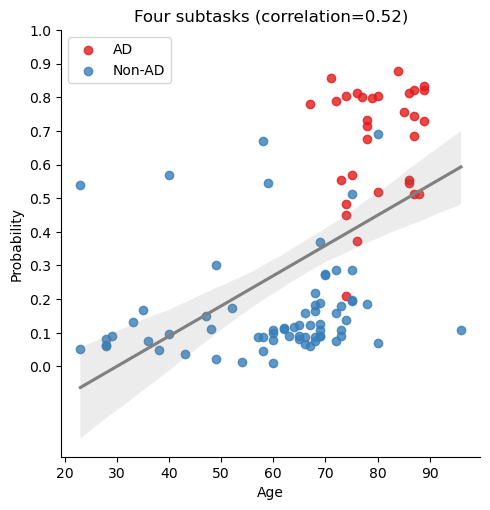

In [59]:
def show_combinedProb_age_relation(pidList):
    prob_list, label_list, age_list = [], [], []
    
    for pid in pidList:
        prediction = one_random_seed_four_subtasks_combined_dict[pid]['probAD']
        label = ADLabel_dict[pid]
        age = AgeLabel_dict[pid]
    
        prob_list.append(prediction)
        label_list.append("AD" if label==1 else "Non-AD")
        age_list.append(age)

    min_age = min(age_list)
    max_age = max(age_list)
    print(f'Number of subjects: {len(age_list)}, Age: {min_age} ~ {max_age}')

    # Calculate Pearson Correlation Coefficient
    r, p_value = stats.pearsonr(prob_list, age_list)
    r = round(r, 2)
    print("Pearson correlation coefficient:", r)

    result_df = pd.DataFrame()
    result_df['Label'] = label_list
    result_df['Age'] = age_list
    result_df['Probability'] = prob_list
    
    print(f'Number of AD & CN subjects (over 66): {len(prob_list)}\n')
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Age'], result_df['Probability'])

    hue_order = ['AD', 'Non-AD']
    sns.lmplot(data=result_df, x="Age", y="Probability", hue="Label", hue_order=hue_order, fit_reg=False, legend=False, palette='Set1')
    ax = sns.regplot(data=result_df, x="Age", y="Probability", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_title(f'Four subtasks (correlation={r})')
    ax.legend()
    
show_combinedProb_age_relation(all_pid_list)

#### AD only

Number of AD subjects: 31, Age: 67 ~ 89
Pearson correlation coefficient: 0.15


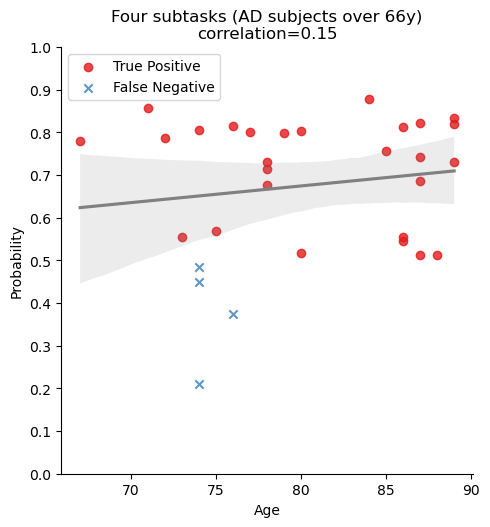

In [63]:
def show_combinedProb_age_relation_onlyAD(pidList):
    prob_list, label_list, age_list = [], [], []
    correct_list = []
    sort_with_age = []
    
    for pid in pidList:
        if pid in one_random_seed_four_subtasks_combined_dict:
            prediction = one_random_seed_four_subtasks_combined_dict[pid]['probAD']
            label = ADLabel_dict[pid]
            pred_label = one_random_seed_four_subtasks_combined_dict[pid]['prediction']
            age = AgeLabel_dict[pid]
            
            if label==1:
                prob_list.append(prediction)
                label_list.append("AD" if label==1 else "Non-AD")
                correct_list.append("True Positive" if label==pred_label else "False Negative")
                age_list.append(age)
                sort_with_age.append([pid, age, prediction, label, pred_label])
   
    min_age = min(age_list)
    max_age = max(age_list)
    print(f'Number of AD subjects: {len(age_list)}, Age: {min_age} ~ {max_age}')

    # Calculate Pearson Correlation Coefficient
    r, p_value = stats.pearsonr(prob_list, age_list)
    r = round(r, 2)
    print("Pearson correlation coefficient:", r)

    result_df = pd.DataFrame()
    result_df['Label'] = label_list
    result_df['Correct'] = correct_list
    result_df['Age'] = age_list
    result_df['Probability'] = prob_list

    slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Age'], result_df['Probability'])

    hue_order = ['True Positive', 'False Negative']
    # sns.lmplot(data=result_df, x="Age", y="Probability", hue="Label", fit_reg=False, legend=False, palette='Set1')
    sns.lmplot(data=result_df, x="Age", y="Probability", hue="Correct", hue_order=hue_order, fit_reg=False, legend=False, palette='Set1', markers=["o", "x"])
    ax = sns.regplot(data=result_df, x="Age", y="Probability", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_title(f'Four subtasks (AD subjects over 66y)\ncorrelation={r}')
    ax.legend()

    sort_with_age_sorted = sorted(sort_with_age, key=operator.itemgetter(1), reverse=False)
    return sort_with_age_sorted

AD_result_sort_with_age = show_combinedProb_age_relation_onlyAD(all_pid_list)
# print(f'AD_result_sort_with_age: [pid, age, prob, label, pred_label]')
# AD_result_sort_with_age

#### Non-AD only

Number of Non-AD subjects: 68, Age: 23 ~ 96
Pearson correlation coefficient: 0.09


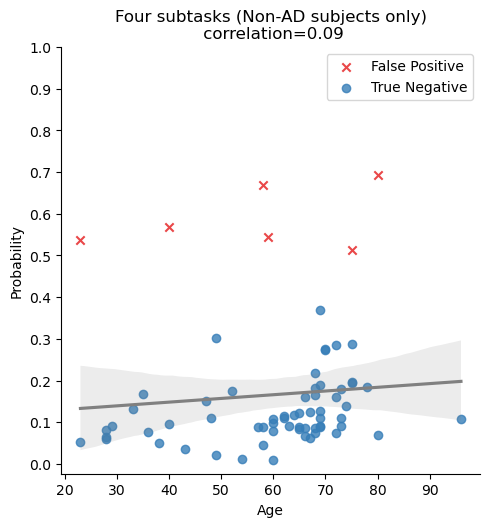

In [64]:
def show_combinedProb_age_relation_onlyCN(pidList):
    prob_list, label_list, age_list = [], [], []
    correct_list = []
    sort_with_age = []
    
    for pid in pidList:
        prediction = one_random_seed_four_subtasks_combined_dict[pid]['probAD']
        label = ADLabel_dict[pid]
        pred_label = one_random_seed_four_subtasks_combined_dict[pid]['prediction']
        age = AgeLabel_dict[pid]
    
        if label==0:
            prob_list.append(prediction)
            label_list.append("AD" if label==1 else "Non-AD")
            age_list.append(age)
            correct_list.append("True Negative" if label==pred_label else "False Positive")
            sort_with_age.append([pid, age, prediction, label, pred_label])

    min_age = min(age_list)
    max_age = max(age_list)
    print(f'Number of Non-AD subjects: {len(age_list)}, Age: {min_age} ~ {max_age}')

    # Calculate Pearson Correlation Coefficient
    r, p_value = stats.pearsonr(prob_list, age_list)
    r = round(r, 2)
    print("Pearson correlation coefficient:", r)

    result_df = pd.DataFrame()
    result_df['Label'] = label_list
    result_df['Correct'] = correct_list
    result_df['Age'] = age_list
    result_df['Probability'] = prob_list

    slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Age'], result_df['Probability'])
    # sns.lmplot(data=result_df, x="Age", y="Probability", hue="Label", fit_reg=False, legend=False)
    sns.lmplot(data=result_df, x="Age", y="Probability", hue="Correct", fit_reg=False, legend=False, palette='Set1', markers=["x", "o"])
    ax = sns.regplot(data=result_df, x="Age", y="Probability", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_title(f'Four subtasks (Non-AD subjects only)\n correlation={r}')
    ax.legend()
    
    sort_with_age_sorted = sorted(sort_with_age, key=operator.itemgetter(1), reverse=True)
    return sort_with_age_sorted

CN_result_sort_with_age = show_combinedProb_age_relation_onlyCN(all_pid_list)
# print(f'CN_result_sort_with_age: [pid, age, prob, label, pred_label]')
# CN_result_sort_with_age

### Small group performance

In [65]:
Age_group_list = [[20, 49], [50, 64], [65, 69], [70, 74], [75, 84], [85, 96]]


def analyze_each_AgeGroup_performance(result_dict, age_dict, groups):
    tmp_dict = {}
    for group_idx, age_group in enumerate(groups):
        lower = age_group[0]
        upper = age_group[1]
        
        n_subject = 0
        pred_list, actual_list = [], []
        for key in result_dict:
            pid = key
            age = age_dict[pid]
            if age>=lower and age<=upper:
                n_subject += 1
                pred_list.append(result_dict[pid]['prediction'])
                actual_list.append(result_dict[pid]['actual'])
                
        print(f'[Age {lower}~{upper}] {n_subject} subjects')
        
        pred_array = np.array(pred_list)
        actual_array = np.array(actual_list)
        matrix = confusion_matrix(actual_array, pred_array)
        
        if matrix.shape==(1, 1) and actual_array[0]==0:
            TN = matrix[0, 0]
            FP = FN = TP = 0
        elif matrix.shape==(1, 1) and actual_array[0]==1:
            TP = matrix[0, 0]
            FP = FN = TN = 0
        else:
            TN, FP, FN, TP = matrix.ravel()
        
        eps = sys.float_info.epsilon
        value_accuracy = round((TP+TN)/(TP+TN+FP+FN), 4)
        value_sensitivity = round(TP/(TP+FN+eps), 4)
        value_specificity = round(TN/(TN+FP+eps), 4)
        value_precision = round(TP/(TP+FP+eps), 4)
        value_f1_score = round(2*value_precision*value_sensitivity/(value_precision+value_sensitivity+eps), 2)
        
        group_name = 'group_'+ str(group_idx)
        tmp_dict[group_name] = {}
        tmp_dict[group_name]['Accuracy'] = round(value_accuracy*100, 2)
        tmp_dict[group_name]['Sensitivity'] = round(value_sensitivity*100, 2)
        tmp_dict[group_name]['Specificity'] = round(value_specificity*100, 2)
        tmp_dict[group_name]['Precision'] = round(value_precision*100, 2)
        tmp_dict[group_name]['F1-score'] = round(value_f1_score, 2)
    return tmp_dict
    
age_group_result_combined = analyze_each_AgeGroup_performance(one_random_seed_four_subtasks_combined_dict, AgeLabel_dict, Age_group_list)

[Age 20~49] 17 subjects
[Age 50~64] 15 subjects
[Age 65~69] 20 subjects
[Age 70~74] 16 subjects
[Age 75~84] 18 subjects
[Age 85~96] 13 subjects


In [67]:
age_group_result_combined

{'group_0': {'Accuracy': 88.24,
  'Sensitivity': 0.0,
  'Specificity': 88.24,
  'Precision': 0.0,
  'F1-score': 0.0},
 'group_1': {'Accuracy': 86.67,
  'Sensitivity': 0.0,
  'Specificity': 86.67,
  'Precision': 0.0,
  'F1-score': 0.0},
 'group_2': {'Accuracy': 100.0,
  'Sensitivity': 100.0,
  'Specificity': 100.0,
  'Precision': 100.0,
  'F1-score': 1.0},
 'group_3': {'Accuracy': 81.25,
  'Sensitivity': 57.14,
  'Specificity': 100.0,
  'Precision': 100.0,
  'F1-score': 0.73},
 'group_4': {'Accuracy': 83.33,
  'Sensitivity': 90.91,
  'Specificity': 71.43,
  'Precision': 83.33,
  'F1-score': 0.87},
 'group_5': {'Accuracy': 100.0,
  'Sensitivity': 100.0,
  'Specificity': 100.0,
  'Precision': 100.0,
  'F1-score': 1.0}}

# P-value

In [63]:
df_raw = pd.read_excel("../Label_Data_Info.xlsx")
df_raw = df_raw.fillna(0)


col_names = ['編號', 'Gender', 'Age', '_Label']

df_raw = df_raw.loc[:, col_names]
df_raw = df_raw.astype({"Age": int, "_Label": int})

df_raw.rename(columns = {'編號':'pid'}, inplace = True)
df_raw.rename(columns = {'Gender':'gender'}, inplace = True)
df_raw.rename(columns = {'Age':'age'}, inplace = True)

gender_encoder = LabelEncoder()
df_raw['gender'] = gender_encoder.fit_transform(df_raw['gender'])

df_raw = df_raw.astype({"gender": int})
df_raw = df_raw[df_raw['pid'] != 41]

df_raw.head()

,pid,gender,age,_Label
0,1,0,40,0
1,2,1,28,0
2,3,0,29,0
3,4,0,71,1
4,5,0,75,0


In [64]:
df_score = pd.read_excel("../Score_Data_Info.xlsx")
df_score = df_score.fillna(0)

col_names = ['編號', 'MMSE/總分30', 'my_CDR', 'my_CDRSOB', '_Label']

df_score = df_score.loc[:, col_names]
df_score = df_score.astype({"MMSE/總分30": int, "my_CDR": float, "my_CDRSOB": float, "_Label": int})

df_score.rename(columns = {'編號':'pid'}, inplace = True)
df_score.rename(columns = {'MMSE/總分30':'MMSE'}, inplace = True)
df_score.rename(columns = {'my_CDR':'CDR'}, inplace = True)
df_score.rename(columns = {'my_CDRSOB':'CDRSOB'}, inplace = True)
df_score.rename(columns = {'_Label':'Label'}, inplace = True)

df_score = df_score[df_score['pid'] != 41]

df_score.head()

,pid,MMSE,CDR,CDRSOB,Label
0,1,30,0.0,0.0,0
1,2,30,0.0,0.0,0
2,3,30,0.0,0.0,0
3,4,23,0.5,1.5,1
4,5,27,0.5,1.0,0


In [65]:
score_dict = {}

def get_score_into_dictionary(df):
    tmp_dict = {}
    for idx in df.index:
        pid = df['pid'][idx]
        MMSE_score = df['MMSE'][idx]
        CDR_score = df['CDR'][idx]
        CDRSOB_score = df['CDRSOB'][idx]

        if idx==0:
            print(f'[Pid {pid}], MMSE: {MMSE_score}, CDR: {CDR_score}, CDRSOB: {CDRSOB_score}')
        
        tmp_dict[pid] = {}
        tmp_dict[pid]['MMSE'] = MMSE_score
        tmp_dict[pid]['CDR'] = CDR_score
        tmp_dict[pid]['CDRSOB'] = CDRSOB_score
    return tmp_dict

score_dict = get_score_into_dictionary(df_score)
score_dict


[Pid 1], MMSE: 30, CDR: 0.0, CDRSOB: 0.0


{1: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 2: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 3: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 4: {'MMSE': 23, 'CDR': 0.5, 'CDRSOB': 1.5},
 5: {'MMSE': 27, 'CDR': 0.5, 'CDRSOB': 1.0},
 6: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 7: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 8: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 9: {'MMSE': 5, 'CDR': 2.0, 'CDRSOB': 6.0},
 10: {'MMSE': 24, 'CDR': 0.5, 'CDRSOB': 1.0},
 11: {'MMSE': 16, 'CDR': 1.0, 'CDRSOB': 9.0},
 12: {'MMSE': 20, 'CDR': 0.5, 'CDRSOB': 1.0},
 13: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 14: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 15: {'MMSE': 30, 'CDR': 0.0, 'CDRSOB': 0.0},
 16: {'MMSE': 16, 'CDR': 0.5, 'CDRSOB': 3.0},
 17: {'MMSE': 26, 'CDR': 0.5, 'CDRSOB': 1.0},
 18: {'MMSE': 16, 'CDR': 0.5, 'CDRSOB': 1.5},
 19: {'MMSE': 21, 'CDR': 0.5, 'CDRSOB': 2.5},
 20: {'MMSE': 23, 'CDR': 0.5, 'CDRSOB': 3.0},
 21: {'MMSE': 28, 'CDR': 0.0, 'CDRSOB': 0.0},
 22: {'MMSE': 29, 'CDR': 0.0, 'CDRSOB': 0.0}

In [66]:
def show_pvalue_table(mode, data, data_score, pidList):
    tmp_df = data.copy()
    tmp_pidList = []
    tmp_labelList = []
    tmp_genderList = []
    tmp_ageList = []

    tmp_df_score = data_score.copy()
    tmp_MMSE_List = []
    tmp_CDR_List = []
    tmp_CDRSOB_List = []
    for idx in range(tmp_df.shape[0]):
        pid = int(tmp_df.iloc[idx]['pid'])
        age = int(tmp_df.iloc[idx]['age'])
        MMSE_score = score_dict[pid]['MMSE']
        CDR_score = score_dict[pid]['CDR']
        CDRSOB_score = score_dict[pid]['CDRSOB']
        if pid in pidList:
            tmp_pidList.append(pid)
            tmp_ageList.append(age)
            if tmp_df.iloc[idx]['gender']==0: tmp_genderList.append('Female')
            else: tmp_genderList.append('Male')
            if tmp_df.iloc[idx]['_Label']==0: tmp_labelList.append('CN')
            else: tmp_labelList.append('AD')

            tmp_MMSE_List.append(MMSE_score)
            tmp_CDR_List.append(CDR_score)
            tmp_CDRSOB_List.append(CDRSOB_score)

    tmp_data = {'gender': tmp_genderList, 'age': tmp_ageList, 'label': tmp_labelList, 'MMSE': tmp_MMSE_List, 'CDR': tmp_CDR_List, 'CDR-SOB': tmp_CDRSOB_List}
    new_df = pd.DataFrame(tmp_data)
    new_df.head()
    # table_all = TableOne(new_df, categorical=['gender'], min_max=['age'], groupby=['label'], nonnormal=['age'],
    #                      pval=True, smd=True, htest_name=True)
    table = TableOne(new_df, categorical=['gender'], groupby=['label'], pval=True, smd=True, htest_name=True)
    return table

table_all = show_pvalue_table("all", df_raw, df_score, all_pid_list)
table_based = show_pvalue_table("basd", df_raw, df_score, all_pid_list_based)
table_walk = show_pvalue_table("walk", df_raw, df_score, walk_pid_list)
table_sitstand = show_pvalue_table("sitstand", df_raw, df_score, sitstand_pid_list)
table_turn = show_pvalue_table("turn", df_raw, df_score, turn_pid_list)
table_facial = show_pvalue_table("facial", df_raw, df_score, facial_pid_list)

In [67]:
table_all

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    99          31           68                                       
gender, n (%)      Female                0    64 (64.6)   17 (54.8)    47 (69.1)   0.249        Chi-squared       0.297
                   Male                       35 (35.4)   14 (45.2)    21 (30.9)                                       
age, mean (SD)                           0  66.2 (16.5)  80.2 (6.4)  59.8 (15.8)  <0.001  Two Sample T-test      -1.689
MMSE, mean (SD)                          0   25.4 (7.1)  18.5 (6.6)   28.5 (4.8)  <0.001  Two Sample T-test       1.730
CDR, mean (SD)                           0    0.2 (0.4)   0.6 (0.3)    0.1 (0.2)  <0.001  Two Sample T-test      -1.764
CDR-SOB, mean (SD)                       0    1.0 (1.9)   2.5 (2.2)    0.4 (1.3)  <0.001  Two Sample T-test      -1.163

In [68]:
table_based

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    81          25           56                                       
gender, n (%)      Female                0    52 (64.2)   13 (52.0)    39 (69.6)   0.201        Chi-squared       0.367
                   Male                       29 (35.8)   12 (48.0)    17 (30.4)                                       
age, mean (SD)                           0  67.1 (16.2)  79.8 (6.3)  61.4 (16.1)  <0.001  Two Sample T-test      -1.503
MMSE, mean (SD)                          0   25.4 (6.8)  19.1 (5.9)   28.2 (5.2)  <0.001  Two Sample T-test       1.627
CDR, mean (SD)                           0    0.2 (0.3)   0.5 (0.2)    0.1 (0.3)  <0.001  Two Sample T-test      -1.838
CDR-SOB, mean (SD)                       0    1.0 (1.9)   2.2 (2.2)    0.5 (1.4)   0.001  Two Sample T-test      -0.956

In [69]:
table_walk

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    88          30           58                                       
gender, n (%)      Female                0    57 (64.8)   17 (56.7)    40 (69.0)   0.363        Chi-squared       0.257
                   Male                       31 (35.2)   13 (43.3)    18 (31.0)                                       
age, mean (SD)                           0  67.6 (16.2)  79.9 (6.4)  61.2 (16.1)  <0.001  Two Sample T-test      -1.529
MMSE, mean (SD)                          0   25.0 (7.1)  18.9 (6.4)   28.2 (5.1)  <0.001  Two Sample T-test       1.611
CDR, mean (SD)                           0    0.3 (0.4)   0.6 (0.3)    0.1 (0.3)  <0.001  Two Sample T-test      -1.632
CDR-SOB, mean (SD)                       0    1.1 (1.9)   2.4 (2.2)    0.4 (1.4)  <0.001  Two Sample T-test      -1.062

In [70]:
table_sitstand

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    88          30           58                                       
gender, n (%)      Female                0    57 (64.8)   17 (56.7)    40 (69.0)   0.363        Chi-squared       0.257
                   Male                       31 (35.2)   13 (43.3)    18 (31.0)                                       
age, mean (SD)                           0  67.6 (16.2)  79.9 (6.4)  61.2 (16.1)  <0.001  Two Sample T-test      -1.529
MMSE, mean (SD)                          0   25.0 (7.1)  18.9 (6.4)   28.2 (5.1)  <0.001  Two Sample T-test       1.611
CDR, mean (SD)                           0    0.3 (0.4)   0.6 (0.3)    0.1 (0.3)  <0.001  Two Sample T-test      -1.632
CDR-SOB, mean (SD)                       0    1.1 (1.9)   2.4 (2.2)    0.4 (1.4)  <0.001  Two Sample T-test      -1.062

In [71]:
table_turn

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    83          26           57                                       
gender, n (%)      Female                0    53 (63.9)   14 (53.8)    39 (68.4)   0.300        Chi-squared       0.302
                   Male                       30 (36.1)   12 (46.2)    18 (31.6)                                       
age, mean (SD)                           0  67.3 (16.1)  79.8 (6.2)  61.6 (16.0)  <0.001  Two Sample T-test      -1.504
MMSE, mean (SD)                          0   25.4 (6.8)  19.4 (5.9)   28.2 (5.2)  <0.001  Two Sample T-test       1.585
CDR, mean (SD)                           0    0.2 (0.3)   0.5 (0.2)    0.1 (0.3)  <0.001  Two Sample T-test      -1.864
CDR-SOB, mean (SD)                       0    1.0 (1.8)   2.2 (2.1)    0.5 (1.4)   0.001  Two Sample T-test      -0.960

In [72]:
table_facial

Grouped by label                                                                             
                                   Missing      Overall          AD           CN P-Value               Test SMD (AD,CN)
n                                                    96          29           67                                       
gender, n (%)      Female                0    63 (65.6)   16 (55.2)    47 (70.1)   0.236        Chi-squared       0.313
                   Male                       33 (34.4)   13 (44.8)    20 (29.9)                                       
age, mean (SD)                           0  65.8 (16.6)  79.9 (6.4)  59.7 (15.9)  <0.001  Two Sample T-test      -1.671
MMSE, mean (SD)                          0   25.5 (7.0)  18.6 (6.5)   28.5 (4.8)  <0.001  Two Sample T-test       1.734
CDR, mean (SD)                           0    0.2 (0.4)   0.6 (0.3)    0.1 (0.2)  <0.001  Two Sample T-test      -1.712
CDR-SOB, mean (SD)                       0    1.0 (1.9)   2.4 (2.2)    0.4 (1.3)  <0.001  Two Sample T-test      -1.122

# 折線圖

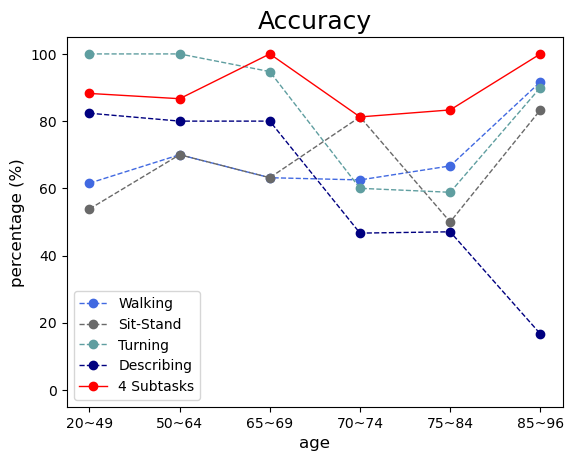

In [68]:
def line_chart_accuracy():
    x = ['20~49', '50~64', '65~69', '70~74', '75~84', '85~96']
    y_walk = [61.54, 70.0, 63.16, 62.5, 66.67, 91.67]
    y_sitstand = [53.85, 70.0, 63.16, 81.25, 50.0, 83.33]
    y_turn = [100.0, 100.0, 94.74, 60.0, 58.82, 90.0]
    y_describing = [82.35, 80.0, 80.0, 46.67, 47.06, 16.67]
    y_4subtask_combined = [88.24, 86.67, 100.0, 81.25, 83.33, 100.0]

    plt.plot(x, y_walk, color='royalblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Walking")
    plt.plot(x, y_sitstand, color='dimgrey', linestyle="--", linewidth="1", markersize="12", marker=".", label="Sit-Stand")
    plt.plot(x, y_turn, color='cadetblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Turning")
    plt.plot(x, y_describing, color='navy', linestyle="--", linewidth="1", markersize="12", marker=".", label="Describing")
    plt.plot(x, y_4subtask_combined, color='red', linestyle="-", linewidth="1", markersize="12", marker=".", label="4 Subtasks")

    plt.xlabel('age', fontsize="12")
    plt.ylabel('percentage (%)', fontsize="12")
    plt.title(f'Accuracy', fontsize="18")
    plt.ylim(-5, 105)
    plt.legend()
    plt.show()


line_chart_accuracy()

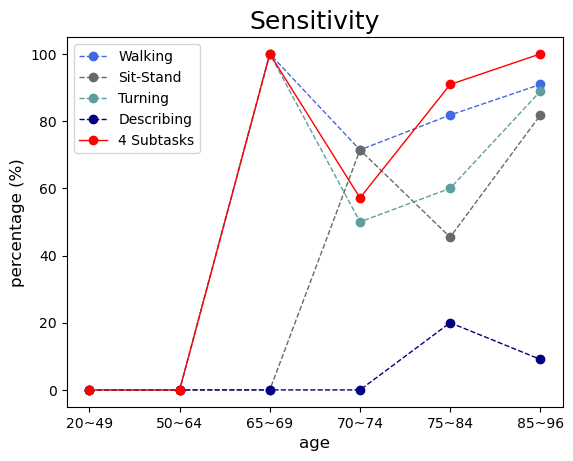

In [69]:
def line_chart_sensitivity():
    x = ['20~49', '50~64', '65~69', '70~74', '75~84', '85~96']
    y_walk = [0.0, 0.0, 100.0, 71.43, 81.82, 90.91]
    y_sitstand = [0.0, 0.0, 0.0, 71.43, 45.45, 81.82]
    y_turn = [0.0, 0.0, 100.0, 50.0, 60.0, 88.89]
    y_describing = [0.0, 0.0, 0.0, 0.0, 20.0, 9.09]
    y_4subtask_combined = [0.0, 0.0, 100.0, 57.14, 90.91, 100.0]

    plt.plot(x, y_walk, color='royalblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Walking")
    plt.plot(x, y_sitstand, color='dimgrey', linestyle="--", linewidth="1", markersize="12", marker=".", label="Sit-Stand")
    plt.plot(x, y_turn, color='cadetblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Turning")
    plt.plot(x, y_describing, color='navy', linestyle="--", linewidth="1", markersize="12", marker=".", label="Describing")
    plt.plot(x, y_4subtask_combined, color='red', linestyle="-", linewidth="1", markersize="12", marker=".", label="4 Subtasks")

    plt.xlabel('age', fontsize="12")
    plt.ylabel('percentage (%)', fontsize="12")
    plt.title(f'Sensitivity', fontsize="18")
    plt.ylim(-5, 105)
    plt.legend()
    plt.show()

line_chart_sensitivity()

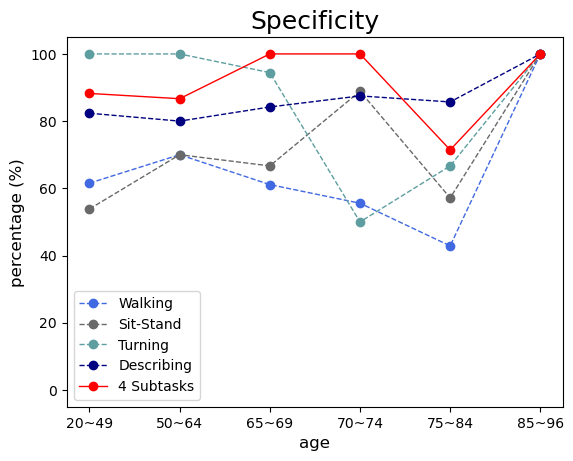

In [70]:
def line_chart_specificity():
    x = ['20~49', '50~64', '65~69', '70~74', '75~84', '85~96']
    y_walk = [61.54, 70.0, 61.11, 55.56, 42.86, 100.0]
    y_sitstand = [53.85, 70.0, 66.67, 88.89, 57.14, 100.0]
    y_turn = [100.0, 100.0, 94.44, 50.0, 66.67, 100.0]
    y_describing = [82.35, 80.0, 84.21, 87.5, 85.71, 100.0]
    y_4subtask_combined = [88.24, 86.67, 100.0, 100.0, 71.43, 100.0]

    plt.plot(x, y_walk, color='royalblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Walking")
    plt.plot(x, y_sitstand, color='dimgrey', linestyle="--", linewidth="1", markersize="12", marker=".", label="Sit-Stand")
    plt.plot(x, y_turn, color='cadetblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Turning")
    plt.plot(x, y_describing, color='navy', linestyle="--", linewidth="1", markersize="12", marker=".", label="Describing")
    plt.plot(x, y_4subtask_combined, color='red', linestyle="-", linewidth="1", markersize="12", marker=".", label="4 Subtasks")

    plt.xlabel('age', fontsize="12")
    plt.ylabel('percentage (%)', fontsize="12")
    plt.title(f'Specificity', fontsize="18")
    plt.ylim(-5, 105)
    plt.legend()
    plt.show()

line_chart_specificity()

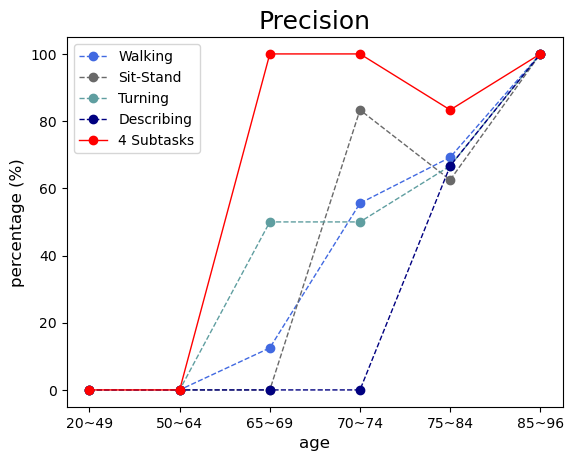

In [71]:
def line_chart_precision():
    x = ['20~49', '50~64', '65~69', '70~74', '75~84', '85~96']
    y_walk = [0.0, 0.0, 12.5, 55.56, 69.23, 100.0]
    y_sitstand = [0.0, 0.0, 0.0, 83.33, 62.5, 100.0]
    y_turn = [0.0, 0.0, 50.0, 50.0, 66.67, 100.0]
    y_describing = [0.0, 0.0, 0.0, 0.0, 66.67, 100.0]
    y_4subtask_combined = [0.0, 0.0, 100.0, 100.0, 83.33, 100.0]

    plt.plot(x, y_walk, color='royalblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Walking")
    plt.plot(x, y_sitstand, color='dimgrey', linestyle="--", linewidth="1", markersize="12", marker=".", label="Sit-Stand")
    plt.plot(x, y_turn, color='cadetblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Turning")
    plt.plot(x, y_describing, color='navy', linestyle="--", linewidth="1", markersize="12", marker=".", label="Describing")
    plt.plot(x, y_4subtask_combined, color='red', linestyle="-", linewidth="1", markersize="12", marker=".", label="4 Subtasks")

    plt.xlabel('age', fontsize="12")
    plt.ylabel('percentage (%)', fontsize="12")
    plt.title(f'Precision', fontsize="18")
    plt.ylim(-5, 105)
    plt.legend()
    plt.show()

line_chart_precision()



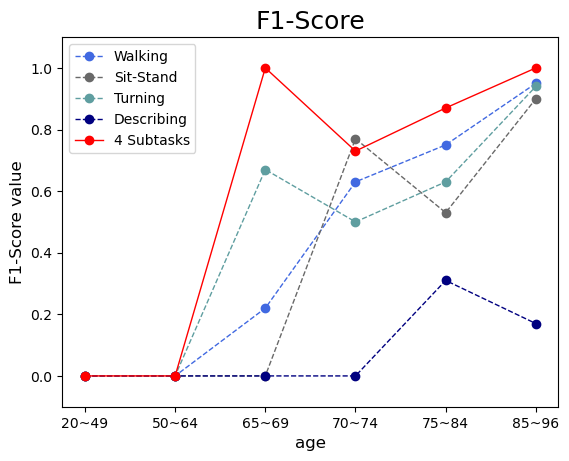

In [72]:
def line_chart_f1score():
    x = ['20~49', '50~64', '65~69', '70~74', '75~84', '85~96']
    y_walk = [0.0, 0.0, 0.22, 0.63, 0.75, 0.95]
    y_sitstand = [0.0, 0.0, 0.0, 0.77, 0.53, 0.90]
    y_turn = [0.0, 0.0, 0.67, 0.5, 0.63, 0.94]
    y_describing = [0.0, 0.0, 0.0, 0.0, 0.31, 0.17]
    y_4subtask_combined = [0.0, 0.0, 1.0, 0.73, 0.87, 1.0]

    plt.plot(x, y_walk, color='royalblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Walking")
    plt.plot(x, y_sitstand, color='dimgrey', linestyle="--", linewidth="1", markersize="12", marker=".", label="Sit-Stand")
    plt.plot(x, y_turn, color='cadetblue', linestyle="--", linewidth="1", markersize="12", marker=".", label="Turning")
    plt.plot(x, y_describing, color='navy', linestyle="--", linewidth="1", markersize="12", marker=".", label="Describing")
    plt.plot(x, y_4subtask_combined, color='red', linestyle="-", linewidth="1", markersize="12", marker=".", label="4 Subtasks")

    plt.xlabel('age', fontsize="12")
    plt.ylabel('F1-Score value', fontsize="12")
    plt.title(f'F1-Score', fontsize="18")
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.show()

line_chart_f1score()